In [103]:
import os.path
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from gensim.downloader import load
import gensim
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist #used to determine number of tokens
from gensim.models import Word2Vec

In [104]:
with open("goemotions.json", "r") as read_content:
    file = pd.read_json(read_content)

Taking count of all sentiment and emotion tags respectively associated with Reddit posts. Then creating a dictionary to create key-value pairings.

In [105]:
print(file.loc[file[0]=='They have THE BEST tortillas too. Made right in front of you. Mmmmmm!'])

                                                        0           1  \
264     They have THE BEST tortillas too. Made right i...     neutral   
23540   They have THE BEST tortillas too. Made right i...     neutral   
73369   They have THE BEST tortillas too. Made right i...  admiration   
86008   They have THE BEST tortillas too. Made right i...  admiration   
115605  They have THE BEST tortillas too. Made right i...    approval   

               2  
264      neutral  
23540    neutral  
73369   positive  
86008   positive  
115605  positive  


In [106]:
sentiment = file[2].value_counts().to_dict()
sentiment_values = sentiment.keys()
sentiment_frequency = sentiment.values()

In [107]:
emotion = file[1].value_counts().to_dict()
emotion_values = emotion.keys()
emotion_frequency = emotion.values()

In [108]:
# print(emotion)
# emotion_list = list(emotion_frequency)
# pdP = pd.Series(emotion_list)
# print(pdP.describe())

In [109]:
# print(sentiment)
# sentiment_list = list(sentiment_frequency)
# pdP = pd.Series(sentiment_list) 
# print(pdP.describe())

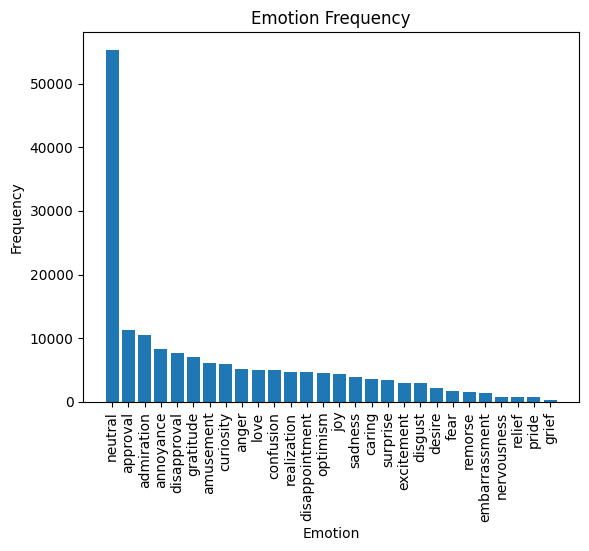

In [110]:
plt.xlabel("Emotion")
plt.ylabel("Frequency")
plt.title("Emotion Frequency")
plt.xticks(rotation= 90) #done for readbility purposes
plt.bar(emotion_values, emotion_frequency)
plt.savefig("bar_emotion.png")
plt.show()

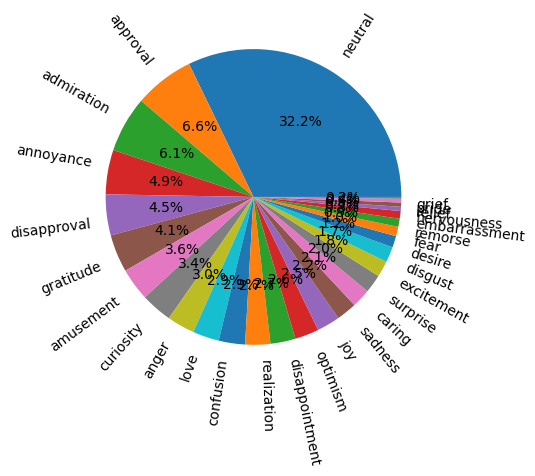

In [111]:
emotionLabels = []
sizes = []
for x, y in emotion.items():
    emotionLabels.append(x)
    sizes.append(y)
plt.pie(sizes, labels=emotionLabels, rotatelabels = True, autopct ='%1.1f%%')
plt.savefig("pie_emotion.png")
plt.show()


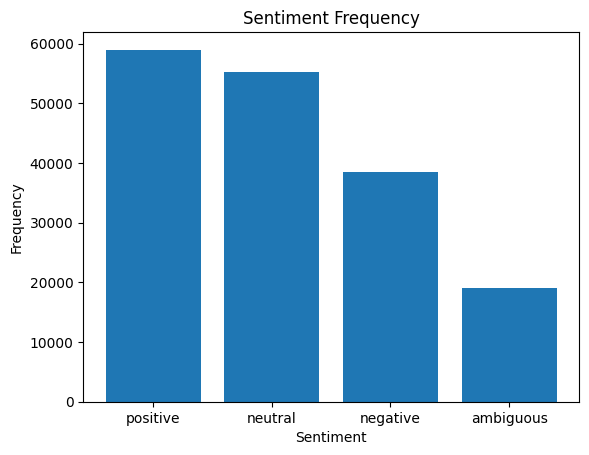

In [112]:
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.title("Sentiment Frequency")
plt.bar(sentiment_values, sentiment_frequency)
plt.savefig("bar_sentiment.png")
plt.show()

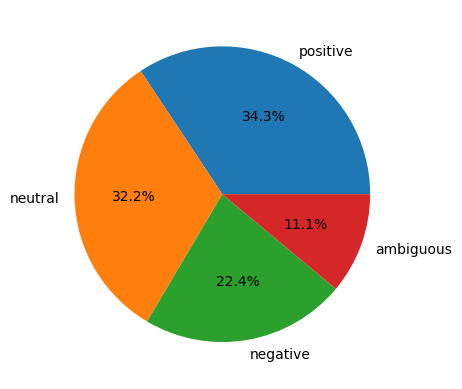

In [113]:
sentimentLabels = []
sizes = []
for x, y in sentiment.items():
    sentimentLabels.append(x)
    sizes.append(y)
plt.pie(sizes, labels=sentimentLabels, autopct ='%1.1f%%')
plt.savefig("pie_sentiment.png")
plt.show()


Plotting of Frequency vs. Emotion and Frequency vs. Sentiment <br>
Source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html <br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html <br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html

<h1>extract tokens/words</h1>

In [114]:
post = file[0].tolist()
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(post)
# vectorizer.get_feature_names_out()

In [115]:
#print(f"The number of unique words is {len(X.toarray()[0])} unique words")

Given that when X.toarray() is used, the occurrences of words in a post is counted for example <br> "This document is the second document."<br> the word document is used twice [0 2 0 1 0 1 1 0 1] mapping to the array of unique words ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
<br>
Sources: <br>
https://stackoverflow.com/questions/27488446/how-do-i-get-word-frequency-in-a-corpus-using-scikit-learn-countvectorizer
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [116]:
post = file[0]
vectorizer = CountVectorizer()
#vectorize posts into words that were used
# file[0] = vectorizer.fit_transform(post)
X = vectorizer.fit_transform(file[0])
# X_features =vectorizer.get_feature_names_out()

leEmo = preprocessing.LabelEncoder()
leSent = preprocessing.LabelEncoder()
#list(le.inverse_transform([2, 2, 1]))
encodedEmo = leEmo.fit_transform(file[1]) #change 0 to the column of emotions with no separation
#vectorize sentiments
encodedSentiment = leSent.fit_transform(file[2]) #change 0 to the column of sentiment with no separation

<h2>2.2 Training and Test data split</h2>

In [117]:
#Question 2.2
X_train,X_test,yemo_train, yemo_test,ysent_train, ysent_test = train_test_split(X,encodedEmo,encodedSentiment, test_size = 0.2, train_size=0.8)

In [118]:
print(len(yemo_train))

137456


In [119]:
def metrics(true_y,prediction_y):
    print(f"Accuracy: {accuracy_score(y_true=true_y,y_pred= prediction_y)}")
    print(f"Precision (Weighted): {precision_score(y_true=true_y,y_pred= prediction_y, average='weighted')}")
    print(f"F1 Score (Weighted): {f1_score(y_true=true_y,y_pred= prediction_y,average='weighted')}")
    print(f"F1 Score (Macro): {f1_score(y_true=true_y,y_pred= prediction_y,average='macro')}")
    print(classification_report(y_true=true_y,y_pred= prediction_y, zero_division='warn'))
    confusion_matrix(y_true=true_y,y_pred= prediction_y)

<h2>Multinomial Naive Bayes Classifier (naive bayes.MultinomialNB.html)
with the default parameters.</h2>

Source: https://www.delftstack.com/howto/python/how-to-get-dictionary-keys-as-a-list-in-python/

In [120]:
classifier = MultinomialNB()
if (os.path.exists('models/MNB1_model.pickle')):
    pickle_in = open('models/MNB1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/MNB1_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/MNB1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)

if (os.path.exists('models/MNB2_model.pickle')):
    pickle_in = open('models/MNB2_model.pickle','rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train,ysent_train)
    with open('models/MNB2_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/MNB2_model.pickle','rb')
    clf2 = pickle.load(pickle_in)


pickle file used
pickle file used


Score for Emotion: 0.4324001862414154
Accuracy: 0.4324001862414154
Precision (Weighted): 0.4720890358919389
F1 Score (Weighted): 0.36544368854720366
F1 Score (Macro): 0.21996953160152177
              precision    recall  f1-score   support

           0       0.54      0.51      0.53      2131
           1       0.61      0.36      0.45      1192
           2       0.56      0.20      0.30      1029
           3       0.40      0.14      0.21      1646
           4       0.43      0.16      0.23      2215
           5       0.51      0.12      0.19       708
           6       0.54      0.10      0.17       969
           7       0.55      0.18      0.27      1171
           8       0.57      0.05      0.10       431
           9       0.45      0.06      0.11       945
          10       0.41      0.15      0.22      1519
          11       0.57      0.11      0.19       595
          12       0.42      0.02      0.03       299
          13       0.51      0.07      0.12       618
  

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_s

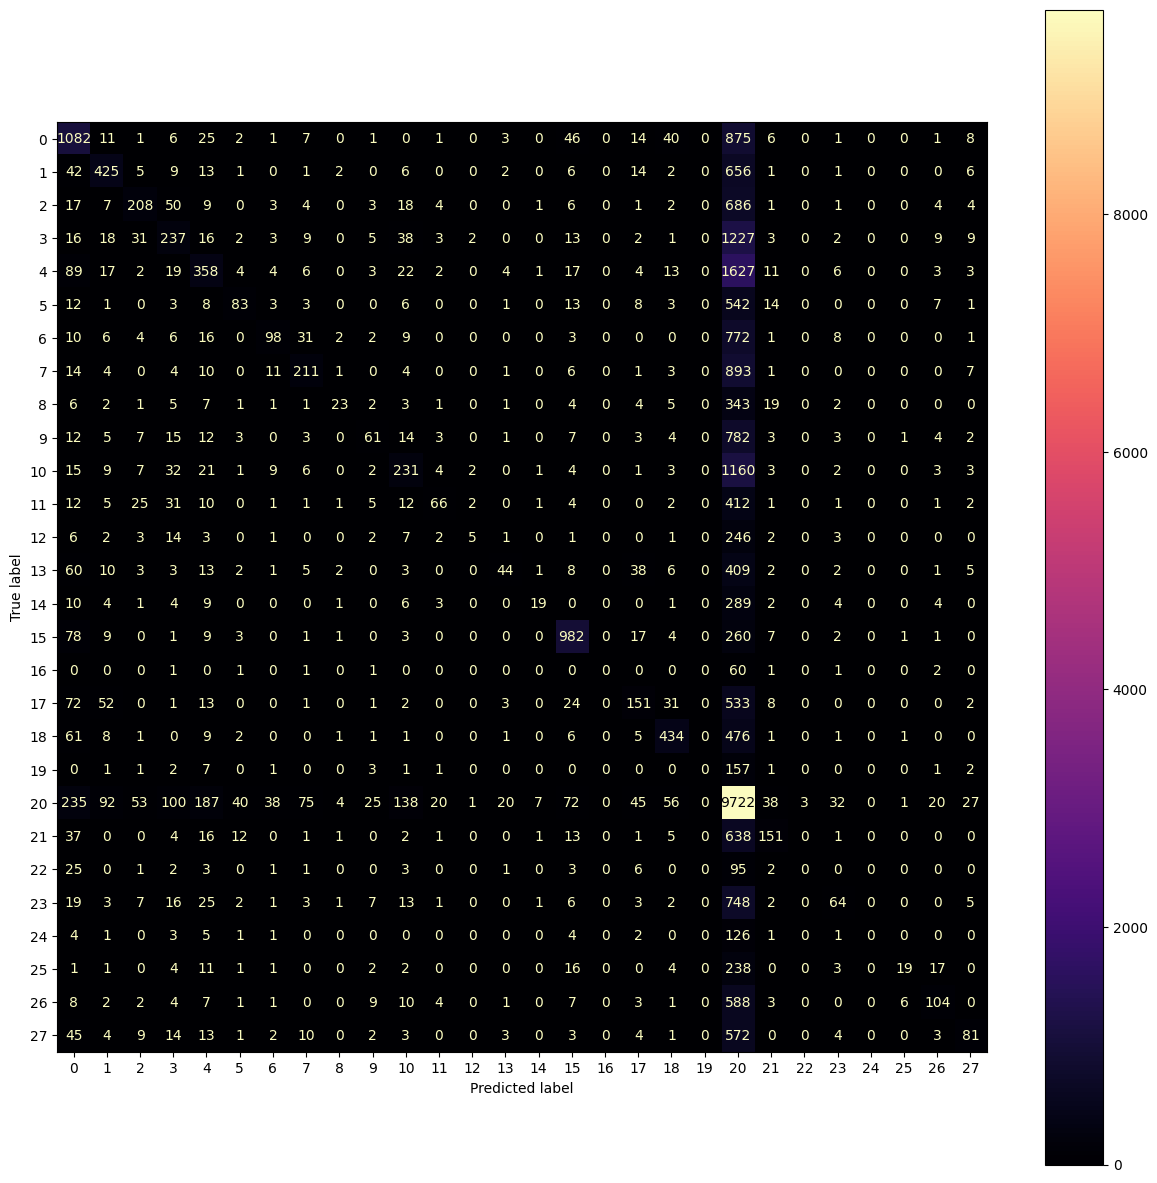

In [121]:
y_emo_predict = clf1.predict(X_test)

print(f"Score for Emotion: {clf1.score(X_test,yemo_test)}")
metrics(yemo_test,y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test,y_pred= y_emo_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax,cmap='magma')

Score for Sentiment: 0.6067978116633687
Accuracy: 0.6067978116633687
Precision (Weighted): 0.6019755404359642
F1 Score (Weighted): 0.6001001173908993
F1 Score (Macro): 0.5680163388435675
              precision    recall  f1-score   support

           0       0.56      0.33      0.42      3843
           1       0.60      0.59      0.60      7717
           2       0.56      0.56      0.56     11051
           3       0.66      0.75      0.70     11753

    accuracy                           0.61     34364
   macro avg       0.59      0.56      0.57     34364
weighted avg       0.60      0.61      0.60     34364



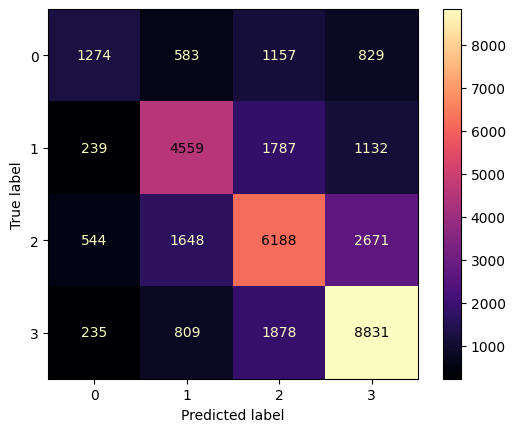

In [122]:
y_sent_predict = clf2.predict(X_test)

print(f"Score for Sentiment: {clf2.score(X_test,ysent_test)}")
metrics(ysent_test,y_sent_predict)
ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')

<h2>cross validation</h2>
<body>from sklearn.model_selection import cross_val_score</body>

<h2>Decision Tree (tree.DecisionTreeClassifier) with the default parameters.</h2>

In [123]:
classifier = DecisionTreeClassifier()
if (os.path.exists('models/DT1_model.pickle')):
    pickle_in = open('models/DT1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/DT1_model.pickle','wb') as f:
            pickle.dump(classifier, f)
    pickle_in = open('models/DT1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)


if (os.path.exists('models/DT2_model.pickle')):

    pickle_in = open('models/DT2_model.pickle','rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train,ysent_train)
    with open('models/DT2_model.pickle','wb') as f:
            pickle.dump(classifier, f)
    pickle_in = open('models/DT2_model.pickle','rb')
    clf2 = pickle.load(pickle_in)


pickle file used
pickle file used


Score for Emotion: 0.5910836922360609
Accuracy: 0.5910836922360609
Precision (Weighted): 0.6064134152517243
F1 Score (Weighted): 0.5878613011456897
F1 Score (Macro): 0.5118961258044675
              precision    recall  f1-score   support

           0       0.58      0.80      0.67      2131
           1       0.60      0.83      0.69      1192
           2       0.46      0.72      0.56      1029
           3       0.39      0.57      0.46      1646
           4       0.44      0.56      0.49      2215
           5       0.48      0.56      0.51       708
           6       0.48      0.57      0.52       969
           7       0.57      0.59      0.58      1171
           8       0.50      0.55      0.52       431
           9       0.44      0.45      0.45       945
          10       0.53      0.49      0.51      1519
          11       0.55      0.42      0.48       595
          12       0.48      0.39      0.43       299
          13       0.51      0.43      0.47       618
    

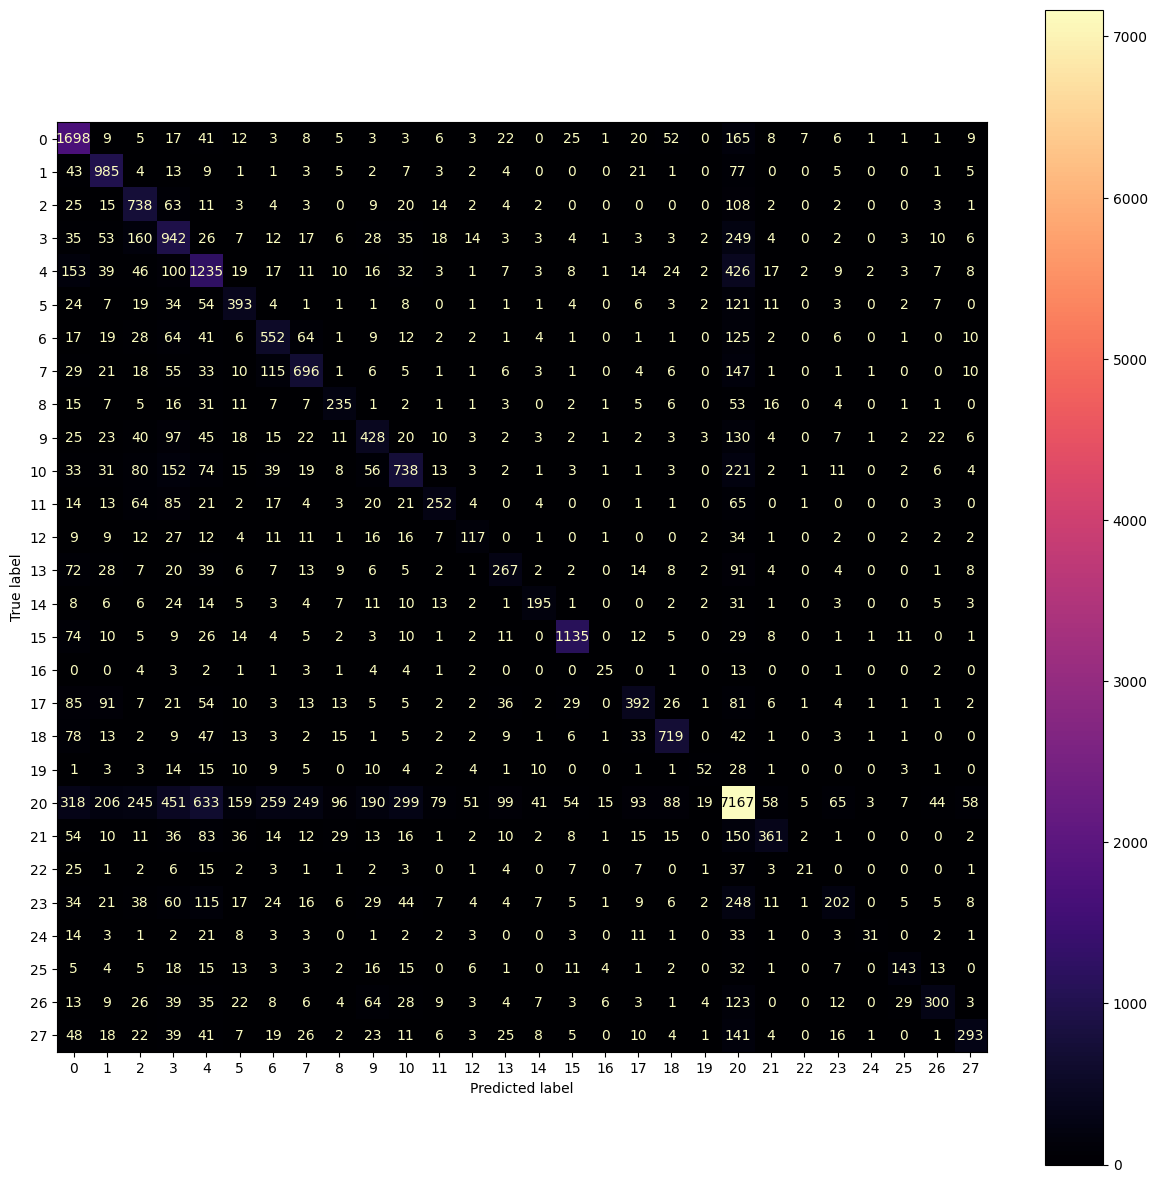

In [124]:
y_emo_predict = clf1.predict(X_test)

print(f"Score for Emotion: {clf1.score(X_test,yemo_test)}")
metrics(yemo_test,y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test,y_pred= y_emo_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax,cmap='magma')


Score for Sentiment: 0.7158363403561867
Accuracy: 0.7158363403561867
Precision (Weighted): 0.7268382151634909
F1 Score (Weighted): 0.7180880314028301
F1 Score (Macro): 0.7031634609813402
              precision    recall  f1-score   support

           0       0.57      0.72      0.63      3843
           1       0.67      0.77      0.72      7717
           2       0.71      0.66      0.68     11051
           3       0.84      0.73      0.78     11753

    accuracy                           0.72     34364
   macro avg       0.69      0.72      0.70     34364
weighted avg       0.73      0.72      0.72     34364



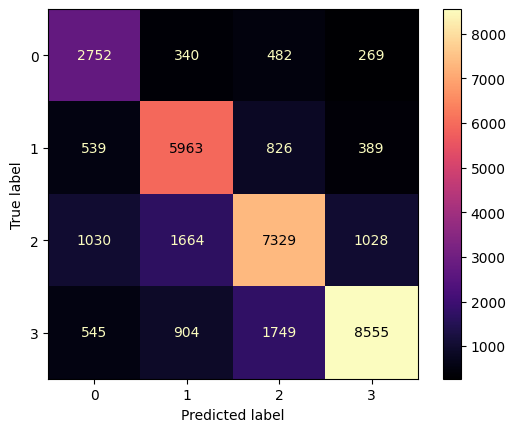

In [125]:
y_sent_predict = clf2.predict(X_test)

print(f"Score for Sentiment: {clf2.score(X_test,ysent_test)}")
metrics(ysent_test,y_sent_predict)
ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')

<h2>Multi-Layered Perceptron (neural network.MLPClassifier) with the default parameters.</h2>

In [126]:
classifier = MLPClassifier()
if (os.path.exists('models/MLP1_model.pickle')):
    pickle_in = open('models/MLP1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    MLP1 = classifier.fit(X_train, yemo_train)
    with open('models/MLP1_model.pickle','wb') as f:
            pickle.dump(classifier, f)
    pickle_in = open('models/MLP1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)

if (os.path.exists('models/MLP2_model.pickle')):
    pickle_in = open('models/MLP2_model.pickle','rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    MLP2 = classifier.fit(X_train,ysent_train)
    with open('models/MLP2_model.pickle','wb') as f:
            pickle.dump(classifier, f)
    pickle_in = open('models/MLP2_model.pickle','rb')
    clf2 = pickle.load(pickle_in)

pickle file used
pickle file used


In [127]:
print(np.shape(X_train))
print(np.shape(yemo_train))

(137456, 30449)
(137456,)


Score for Emotion: 0.5745256663950646
Accuracy: 0.5745256663950646
Precision (Weighted): 0.5683584040569329
F1 Score (Weighted): 0.5691786430746925
F1 Score (Macro): 0.5042444982213085
              precision    recall  f1-score   support

           0       0.63      0.65      0.64      2131
           1       0.64      0.66      0.65      1192
           2       0.53      0.52      0.52      1029
           3       0.43      0.39      0.41      1646
           4       0.47      0.38      0.42      2215
           5       0.50      0.45      0.48       708
           6       0.49      0.46      0.47       969
           7       0.57      0.48      0.52      1171
           8       0.44      0.56      0.49       431
           9       0.44      0.40      0.42       945
          10       0.46      0.47      0.47      1519
          11       0.52      0.47      0.49       595
          12       0.44      0.42      0.43       299
          13       0.47      0.38      0.42       618
    

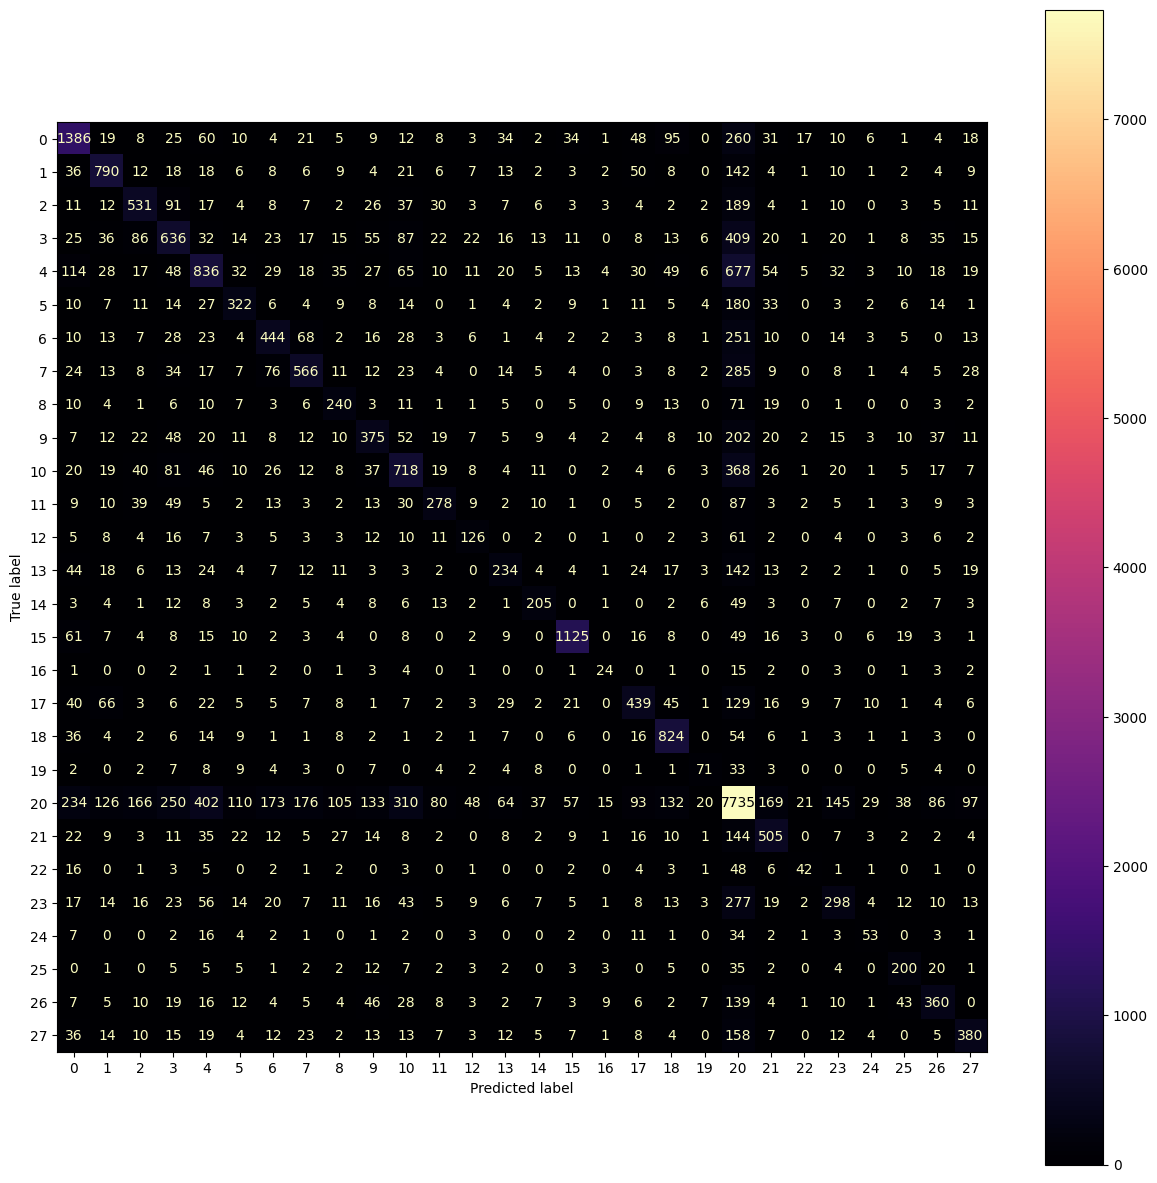

In [128]:
y_emo_predict = clf1.predict(X_test)

print(f"Score for Emotion: {clf1.score(X_test,yemo_test)}")
metrics(yemo_test,y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test,y_pred= y_emo_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax,cmap='magma')

Score for Sentiment: 0.5570946339192178
Accuracy: 0.5570946339192178
Precision (Weighted): 0.5649659324265445
F1 Score (Weighted): 0.5415227079643674
F1 Score (Macro): 0.4830176776990285
              precision    recall  f1-score   support

           0       0.55      0.13      0.21      3843
           1       0.56      0.46      0.50      7717
           2       0.47      0.64      0.54     11051
           3       0.66      0.68      0.67     11753

    accuracy                           0.56     34364
   macro avg       0.56      0.48      0.48     34364
weighted avg       0.56      0.56      0.54     34364



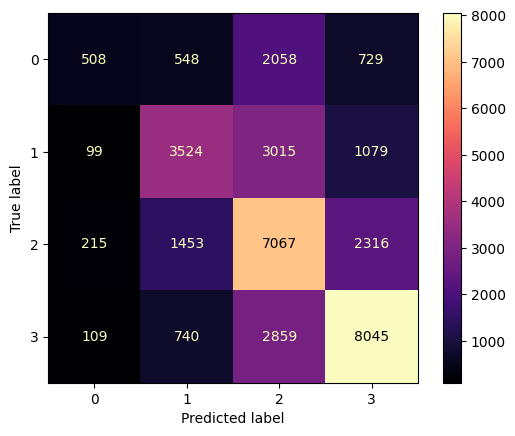

In [129]:
y_sent_predict = clf2.predict(X_test)

print(f"Score for Sentiment: {clf2.score(X_test,ysent_test)}")
metrics(ysent_test,y_sent_predict)
ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')

<h2>Multinomial Naive Bayes Classifier found using GridSearchCV</h2>

input parameter requires a model object

using the following alpha parameters 0.5,0,0.36,1


In [130]:
parameters = {"alpha":(0.5,0,0.36,1)}
clfMNB = MultinomialNB()

classifier = GridSearchCV(estimator=clfMNB, param_grid=parameters,n_jobs=-1)

if (os.path.exists('models/MNB1GridCV_model.pickle')):
    pickle_in = open('models/MNB1GridCV_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/MNB1GridCV_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/MNB1GridCV_model.pickle','rb')
    clf1 = pickle.load(pickle_in)

if (os.path.exists('models/MNB2GridCV_model.pickle')):
    pickle_in = open('models/MNB2GridCV_model.pickle','rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train,ysent_train)
    with open('models/MNB2GridCV_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/MNB2GridCV_model.pickle','rb')
    clf2 = pickle.load(pickle_in)

pickle file used
pickle file used


<h2>Decision Tree Classifier found using GridSearchCV</h2>

input parameter requires a model object

using the various value for the following parameters: criterion, max_depth, min_samples


In [131]:
parameters = {"criterion":("gini","entropy"),"max_depth":(100,3),"min_samples_split":(12,5,30)}
clfDT = DecisionTreeClassifier()

classifier = GridSearchCV(estimator=clfDT, param_grid=parameters,n_jobs=-1)

if (os.path.exists('models/DT1GridCV_model.pickle')):
    pickle_in = open('models/DT1GridCV_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/DT1GridCV_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/DT1GridCV_model.pickle','rb')
    clf1 = pickle.load(pickle_in)

if (os.path.exists('models/DT2GridCV_model.pickle')):
    pickle_in = open('models/DT2GridCV_model.pickle','rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train,ysent_train)
    with open('models/DT2GridCV_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/DT2GridCV_model.pickle','rb')
    clf2 = pickle.load(pickle_in)

pickle file used
pickle file used


Best estimator (Emotion): DecisionTreeClassifier(max_depth=100, min_samples_split=30), Best Score: 0.4044639513068846
Accuracy: 0.5006111046443953
Precision (Weighted): 0.5028011219456348
F1 Score (Weighted): 0.4595741328139637
F1 Score (Macro): 0.35990854393894395
              precision    recall  f1-score   support

           0       0.57      0.55      0.56      2131
           1       0.59      0.65      0.62      1192
           2       0.48      0.34      0.40      1029
           3       0.36      0.19      0.25      1646
           4       0.40      0.18      0.25      2215
           5       0.44      0.22      0.29       708
           6       0.49      0.28      0.35       969
           7       0.52      0.24      0.33      1171
           8       0.48      0.26      0.34       431
           9       0.41      0.14      0.21       945
          10       0.45      0.22      0.30      1519
          11       0.54      0.27      0.36       595
          12       0.51      0.

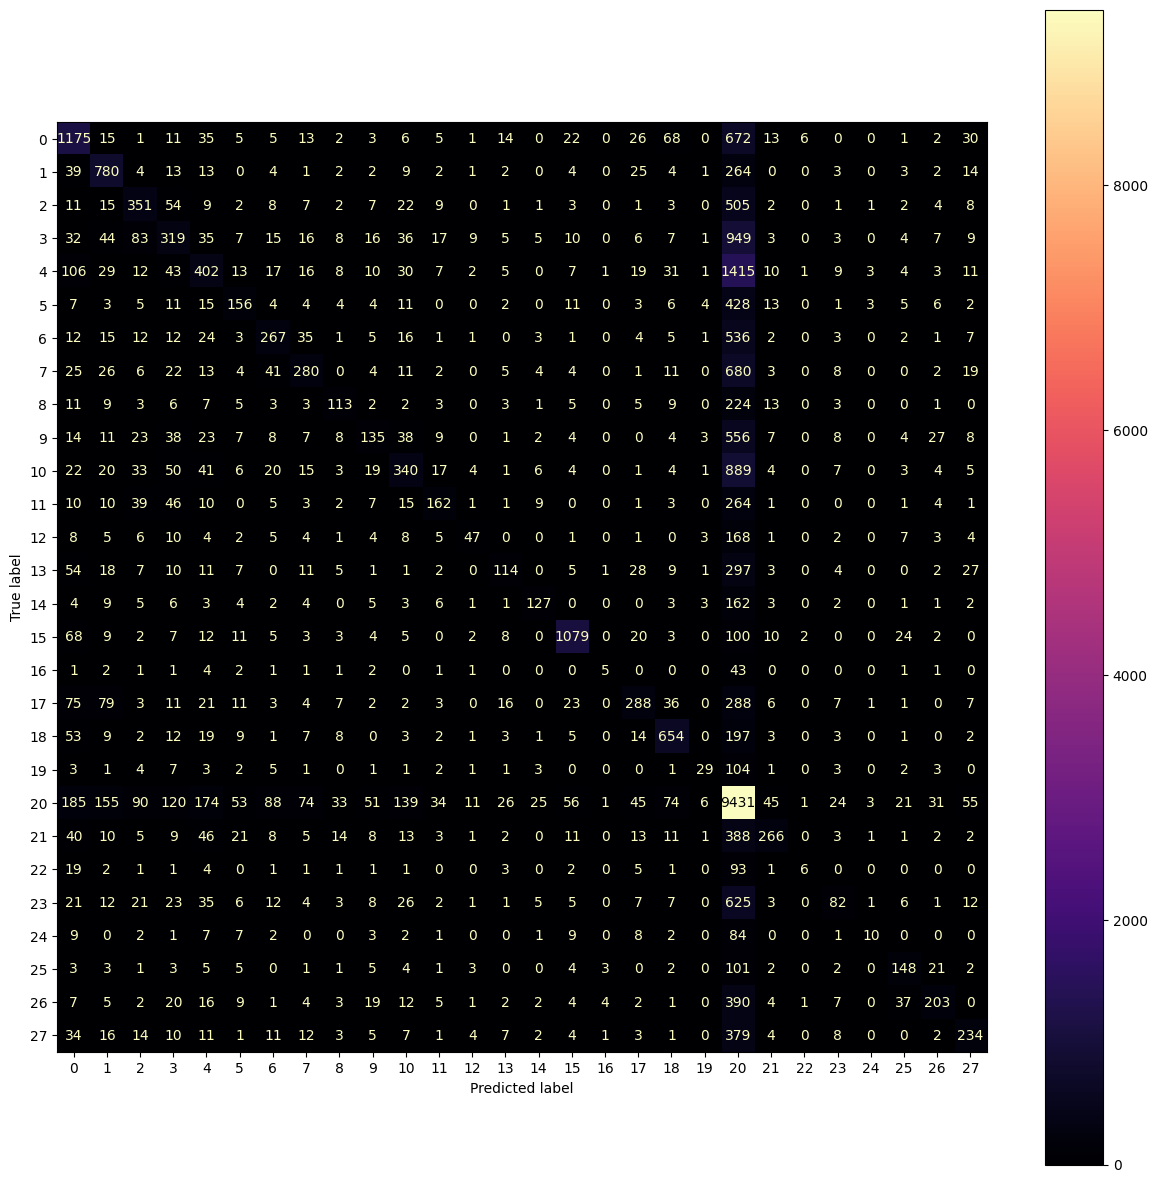

In [132]:
y_emo_predict = clf1.best_estimator_.predict(X_test)

print(f"Best estimator (Emotion): {clf1.best_estimator_}, Best Score: {clf1.best_score_}")
metrics(yemo_test,y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test,y_pred= y_emo_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax,cmap='magma')

Best estimator (Sentiment): DecisionTreeClassifier(max_depth=100, min_samples_split=5), Best Score: 0.515219404662324
Accuracy: 0.6157024793388429
Precision (Weighted): 0.661141833468615
F1 Score (Weighted): 0.6174669039325897
F1 Score (Macro): 0.592018219820216
              precision    recall  f1-score   support

           0       0.54      0.44      0.49      3843
           1       0.68      0.50      0.58      7717
           2       0.50      0.78      0.61     11051
           3       0.84      0.59      0.69     11753

    accuracy                           0.62     34364
   macro avg       0.64      0.58      0.59     34364
weighted avg       0.66      0.62      0.62     34364



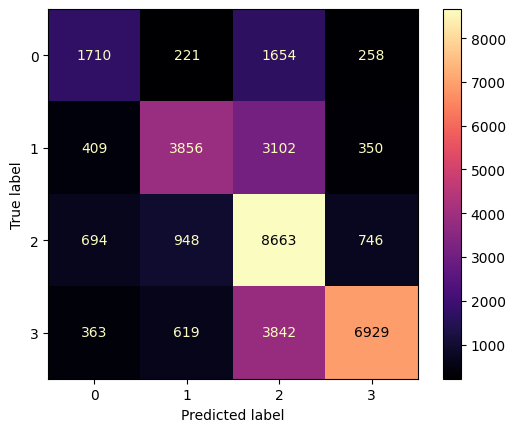

In [133]:
y_sent_predict = clf2.best_estimator_.predict(X_test)

print(f"Best estimator (Sentiment): {clf2.best_estimator_}, Best Score: {clf2.best_score_}")
metrics(ysent_test,y_sent_predict)
ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')

<h2>Multi-Layered Perceptron found using GridSearchCV</h2>

input parameter requires a model object

using the various value for the following parameters: activation, architectures, solvers
Hidden layers <a href="https://datascience.stackexchange.com/questions/19768/how-to-implement-pythons-mlpclassifier-with-gridsearchcv">Link</a>

<b>Unable to converge</b>


In [134]:
parameters = {"activation":("identity", "logistic", "tanh", "relu"),"hidden_layer_sizes":((5,5),(5,10)), "solver":("adam","sgd")}
#currently 5 neurons then 5 neurons and 5 neurons then 10 neurons in the hidden layer
clfMLP = MLPClassifier(early_stopping=True, verbose=True,max_iter=5)
classifier = GridSearchCV(estimator=clfMLP, param_grid=parameters,n_jobs=-1)
skip=False
if(not skip):
    if (os.path.exists('models/MLP1GridCV_model.pickle')):
        pickle_in = open('models/MLP1GridCV_model.pickle','rb')
        clf1 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        classifier = classifier.fit(X_train, yemo_train)
        with open('models/MLP1GridCV_model.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/MLP1GridCV_model.pickle','rb')
        clf1 = pickle.load(pickle_in)

    if (os.path.exists('models/MLP2GridCV_model.pickle')):
        pickle_in = open('models/MLP2GridCV_model.pickle','rb')
        clf2 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        classifier = classifier.fit(X_train,ysent_train)
        with open('models/MLP2GridCV_model.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/MLP2GridCV_model.pickle','rb')
        clf2 = pickle.load(pickle_in)
else:
    print("skipped")

pickle file used
pickle file used


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.1.2 wh

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_s

Accuracy: 0.45335234547782566
Precision (Weighted): 0.42967963875422993
F1 Score (Weighted): 0.37476037313320076
F1 Score (Macro): 0.2370550834358038
              precision    recall  f1-score   support

           0       0.51      0.54      0.52      2131
           1       0.53      0.65      0.59      1192
           2       0.42      0.26      0.32      1029
           3       0.20      0.05      0.08      1646
           4       0.34      0.09      0.15      2215
           5       0.75      0.00      0.01       708
           6       0.42      0.10      0.16       969
           7       0.44      0.19      0.26      1171
           8       0.56      0.10      0.17       431
           9       0.33      0.00      0.00       945
          10       0.29      0.12      0.17      1519
          11       0.58      0.04      0.07       595
          12       0.50      0.00      0.01       299
          13       0.54      0.05      0.08       618
          14       0.49      0.30      

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_s

              precision    recall  f1-score   support

           0       0.51      0.54      0.52      2131
           1       0.53      0.65      0.59      1192
           2       0.42      0.26      0.32      1029
           3       0.20      0.05      0.08      1646
           4       0.34      0.09      0.15      2215
           5       0.75      0.00      0.01       708
           6       0.42      0.10      0.16       969
           7       0.44      0.19      0.26      1171
           8       0.56      0.10      0.17       431
           9       0.33      0.00      0.00       945
          10       0.29      0.12      0.17      1519
          11       0.58      0.04      0.07       595
          12       0.50      0.00      0.01       299
          13       0.54      0.05      0.08       618
          14       0.49      0.30      0.37       357
          15       0.75      0.80      0.77      1379
          16       0.00      0.00      0.00        68
          17       0.44    

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


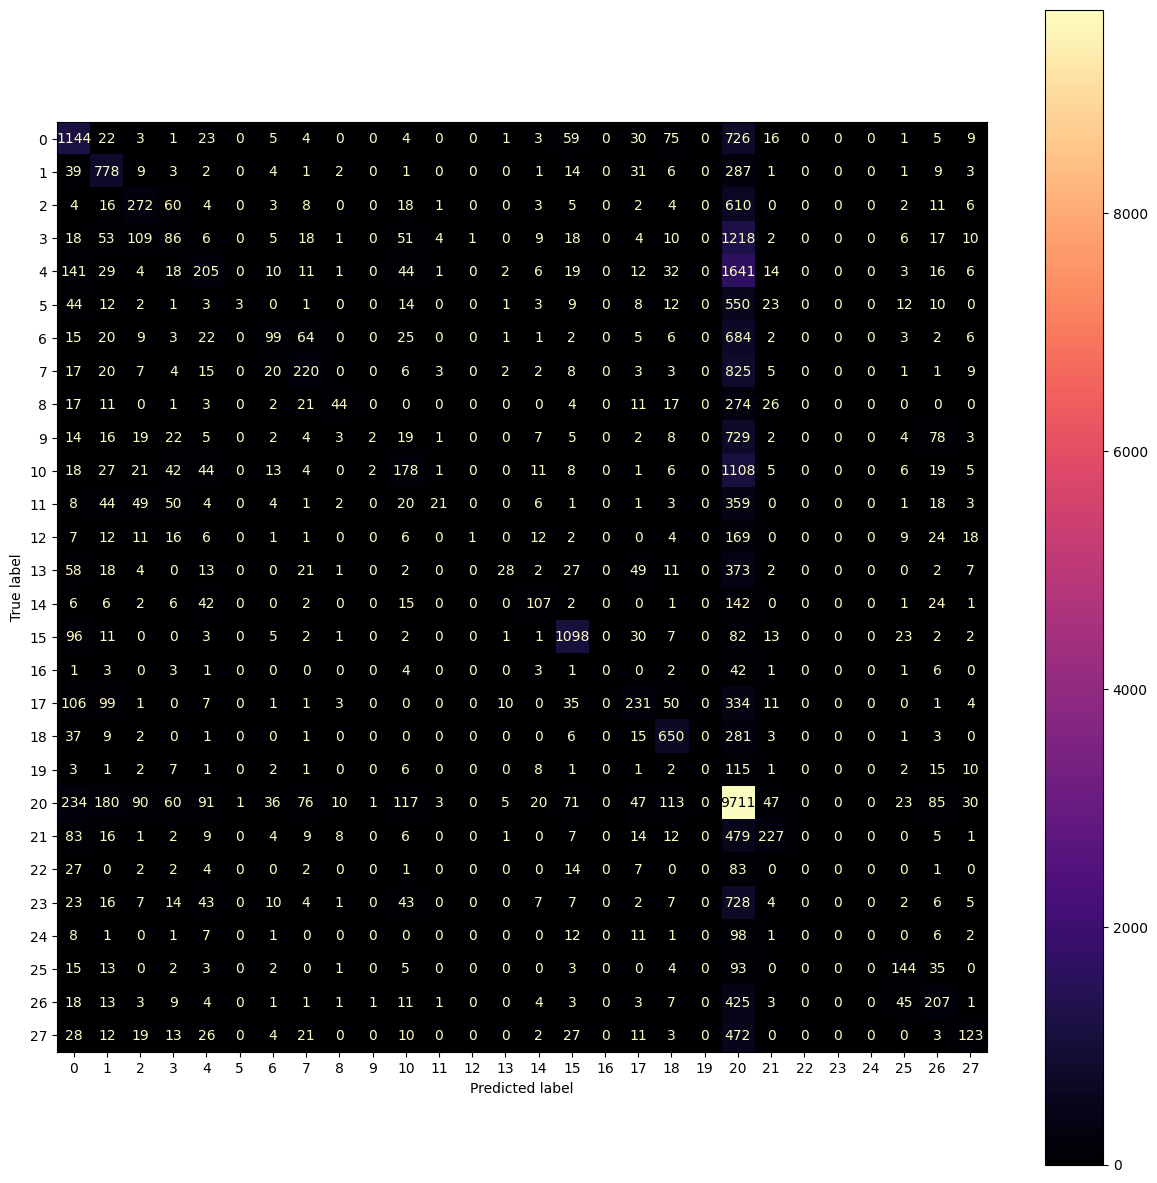

In [135]:
if (os.path.exists('models/MLP1GridCV_model.pickle') and not skip):
    y_emo_predict = clf1.best_estimator_.predict(X_test)
    metrics(yemo_test,y_emo_predict)
    print(f"Best estimator (Emotion): {clf1.best_estimator_}, Best Score: {clf1.best_score_}")
    metrics(yemo_test,y_emo_predict)
    cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test,y_pred= y_emo_predict))
    fig, ax = plt.subplots(figsize=(15,15))
    cmp.plot(ax=ax,cmap='magma')
else:
    print("skipped")

Accuracy: 0.6330753113723664
Precision (Weighted): 0.6314878688758456
F1 Score (Weighted): 0.627335978276708
F1 Score (Macro): 0.5920634678258017
              precision    recall  f1-score   support

           0       0.59      0.33      0.42      3843
           1       0.64      0.60      0.62      7717
           2       0.57      0.63      0.60     11051
           3       0.70      0.76      0.73     11753

    accuracy                           0.63     34364
   macro avg       0.62      0.58      0.59     34364
weighted avg       0.63      0.63      0.63     34364

Best estimator (Sentiment): MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(5, 10), max_iter=5, verbose=True), Best Score: 0.5612705192148834


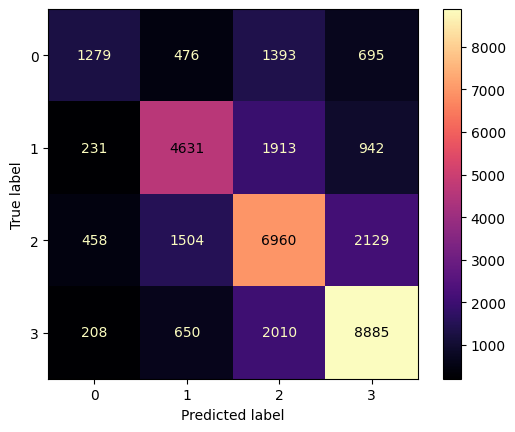

In [136]:
if (os.path.exists('models/MLP2GridCV_model.pickle') and not skip):
    y_sent_predict = clf2.best_estimator_.predict(X_test)
    metrics(ysent_test,y_sent_predict)
    print(f"Best estimator (Sentiment): {clf2.best_estimator_}, Best Score: {clf2.best_score_}")
    ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')
else:
    print("skipped")

<h3>2.5</h3>
Test/Training split: 80/20 -> 50/50
Anticipated effect: increased accuracy but poor generalization


In [137]:
post = file[0]
vectorizer = CountVectorizer()
#vectorize posts into words that were used
# file[0] = vectorizer.fit_transform(post)
X = vectorizer.fit_transform(file[0])
# X_features =vectorizer.get_feature_names_out()

leEmo = preprocessing.LabelEncoder()
leSent = preprocessing.LabelEncoder()
#list(le.inverse_transform([2, 2, 1]))
encodedEmo = leEmo.fit_transform(file[1])  #change 0 to the column of emotions with no separation
#vectorize sentiments
encodedSentiment = leSent.fit_transform(file[2])  #change 0 to the column of sentiment with no separation



In [138]:
X_train, X_test, yemo_train, yemo_test, ysent_train, ysent_test = train_test_split(X, encodedEmo, encodedSentiment,test_size=0.5, train_size=0.5)

<h2>Multinomial Naive Bayes Classifier (naive bayes.MultinomialNB.html) using new test train split</h2>

In [139]:
classifier = MultinomialNB()
if (os.path.exists('models/new_split/MNB1_model_new_split.pickle')):
    pickle_in = open('models/new_split/MNB1_model_new_split.pickle', 'rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")

else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/new_split/MNB1_model_new_split.pickle', 'wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/new_split/MNB1_model_new_split.pickle', 'rb')
    clf1 = pickle.load(pickle_in)

if (os.path.exists('models/new_split/MNB2_model_new_split.pickle')):
    pickle_in = open('models/new_split/MNB2_model_new_split.pickle', 'rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, ysent_train)
    with open('models/new_split/MNB2_model_new_split.pickle', 'wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/new_split/MNB2_model_new_split.pickle', 'rb')
    clf2 = pickle.load(pickle_in)

pickle file used
pickle file used


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator MultinomialNB from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


Score for Emotion: 0.45189151437550923
Accuracy: 0.45189151437550923
Precision (Weighted): 0.49875460733376226
F1 Score (Weighted): 0.3930348497033974
F1 Score (Macro): 0.25159333849571
              precision    recall  f1-score   support

           0       0.54      0.54      0.54      5172
           1       0.60      0.42      0.49      3082
           2       0.53      0.22      0.31      2594
           3       0.44      0.17      0.25      4206
           4       0.46      0.19      0.27      5633
           5       0.43      0.13      0.20      1699
           6       0.55      0.13      0.21      2428
           7       0.57      0.19      0.29      2951
           8       0.61      0.08      0.14      1097
           9       0.51      0.10      0.17      2326
          10       0.46      0.18      0.26      3845
          11       0.55      0.14      0.23      1448
          12       0.72      0.04      0.07       699
          13       0.54      0.08      0.15      1510
   

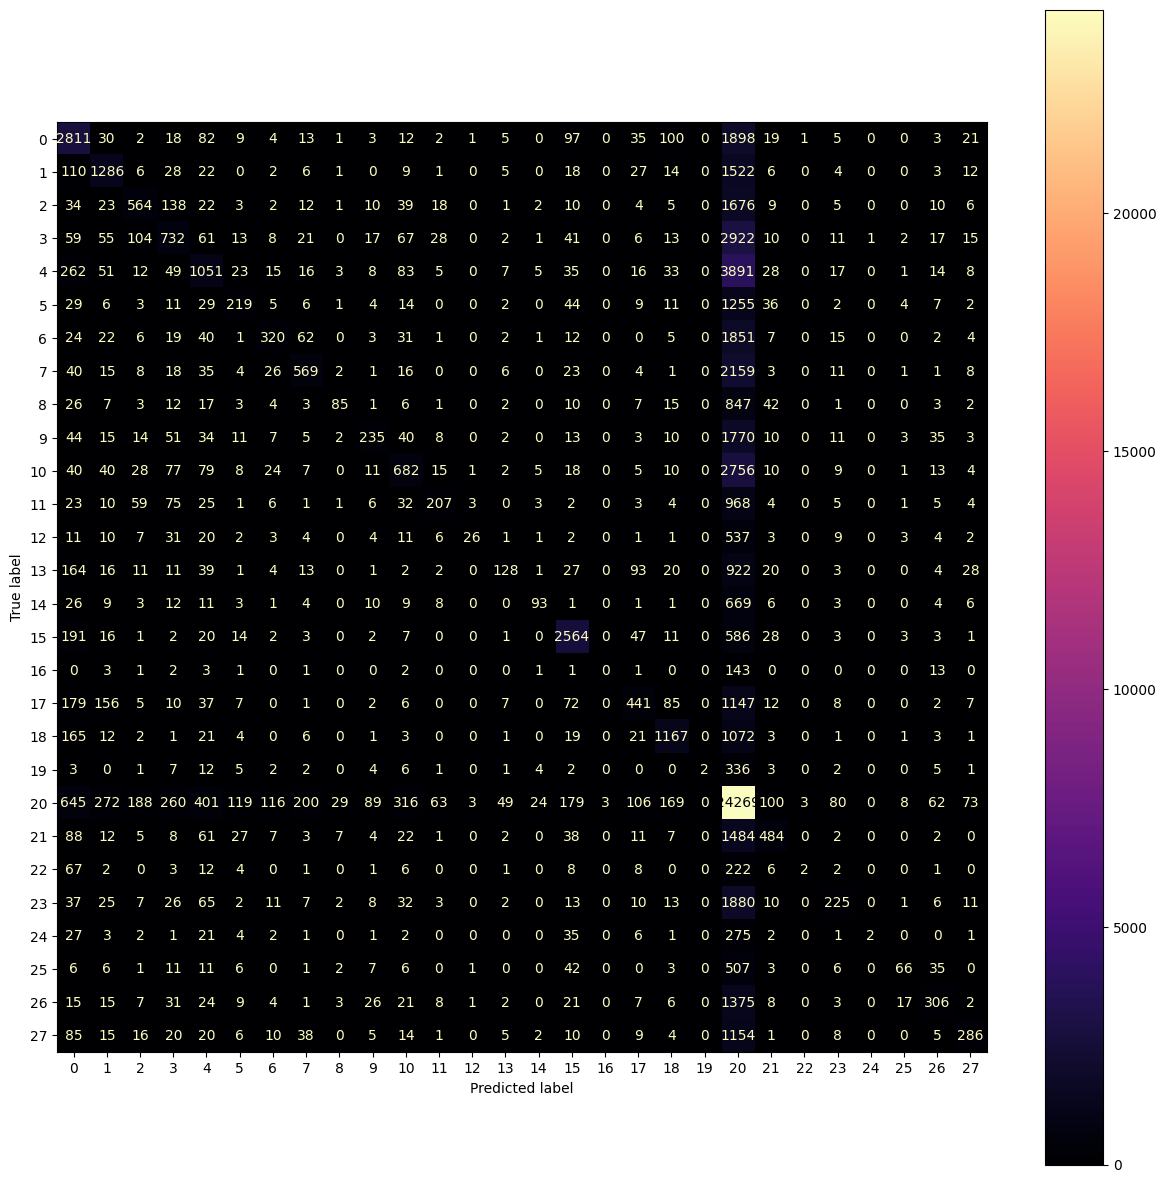

In [140]:
y_emo_predict = clf1.predict(X_test)

print(f"Score for Emotion: {clf1.score(X_test, yemo_test)}")
metrics(yemo_test, y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test, y_pred=y_emo_predict))
fig, ax = plt.subplots(figsize=(15, 15))
cmp.plot(ax=ax, cmap='magma')

Score for Sentiment: 0.618007216854848
Accuracy: 0.618007216854848
Precision (Weighted): 0.6131399039437113
F1 Score (Weighted): 0.6120770692286888
F1 Score (Macro): 0.5804252155193406
              precision    recall  f1-score   support

           0       0.55      0.35      0.43      9489
           1       0.61      0.62      0.61     19201
           2       0.58      0.57      0.57     27826
           3       0.67      0.75      0.71     29394

    accuracy                           0.62     85910
   macro avg       0.60      0.57      0.58     85910
weighted avg       0.61      0.62      0.61     85910



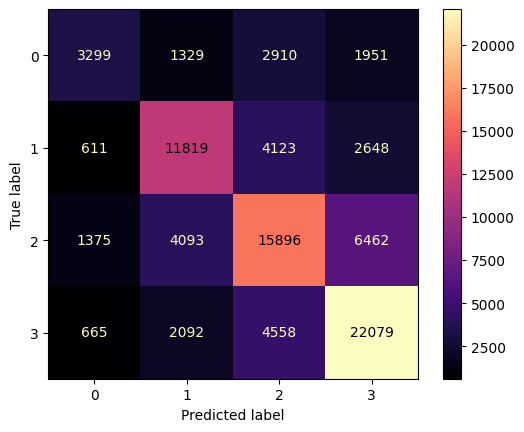

In [141]:
y_sent_predict = clf2.predict(X_test)

print(f"Score for Sentiment: {clf2.score(X_test, ysent_test)}")
metrics(ysent_test, y_sent_predict)
ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')

<h2>Decision Tree (tree.DecisionTreeClassifier) using new test train split</h2>

In [142]:
classifier = DecisionTreeClassifier()
if (os.path.exists('models/new_split/DT1_model_new_split.pickle')):
    pickle_in = open('models/new_split/DT1_model_new_split.pickle', 'rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/new_split/DT1_model_new_split.pickle', 'wb') as f:
        pickle.dump(classifier, f)
    pickle_in = open('models/new_split/DT1_model_new_split.pickle', 'rb')
    clf1 = pickle.load(pickle_in)

if (os.path.exists('models/new_split/DT2_model_new_split.pickle')):
    pickle_in = open('models/new_split/DT2_model_new_split.pickle', 'rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, ysent_train)
    with open('models/new_split/DT2_model_new_split.pickle', 'wb') as f:
        pickle.dump(classifier, f)
    pickle_in = open('models/new_split/DT2_model_new_split.pickle', 'rb')
    clf2 = pickle.load(pickle_in)

pickle file used
pickle file used


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


Score for Emotion: 0.6212664416249564
Accuracy: 0.6212664416249564
Precision (Weighted): 0.6325113726816292
F1 Score (Weighted): 0.6162025625758405
F1 Score (Macro): 0.5375818376547288
              precision    recall  f1-score   support

           0       0.59      0.83      0.69      5172
           1       0.59      0.82      0.69      3082
           2       0.47      0.70      0.56      2594
           3       0.43      0.58      0.49      4206
           4       0.49      0.55      0.52      5633
           5       0.49      0.59      0.53      1699
           6       0.52      0.56      0.54      2428
           7       0.60      0.62      0.61      2951
           8       0.53      0.52      0.53      1097
           9       0.49      0.45      0.47      2326
          10       0.57      0.50      0.53      3845
          11       0.59      0.42      0.49      1448
          12       0.54      0.38      0.45       699
          13       0.57      0.43      0.49      1510
    

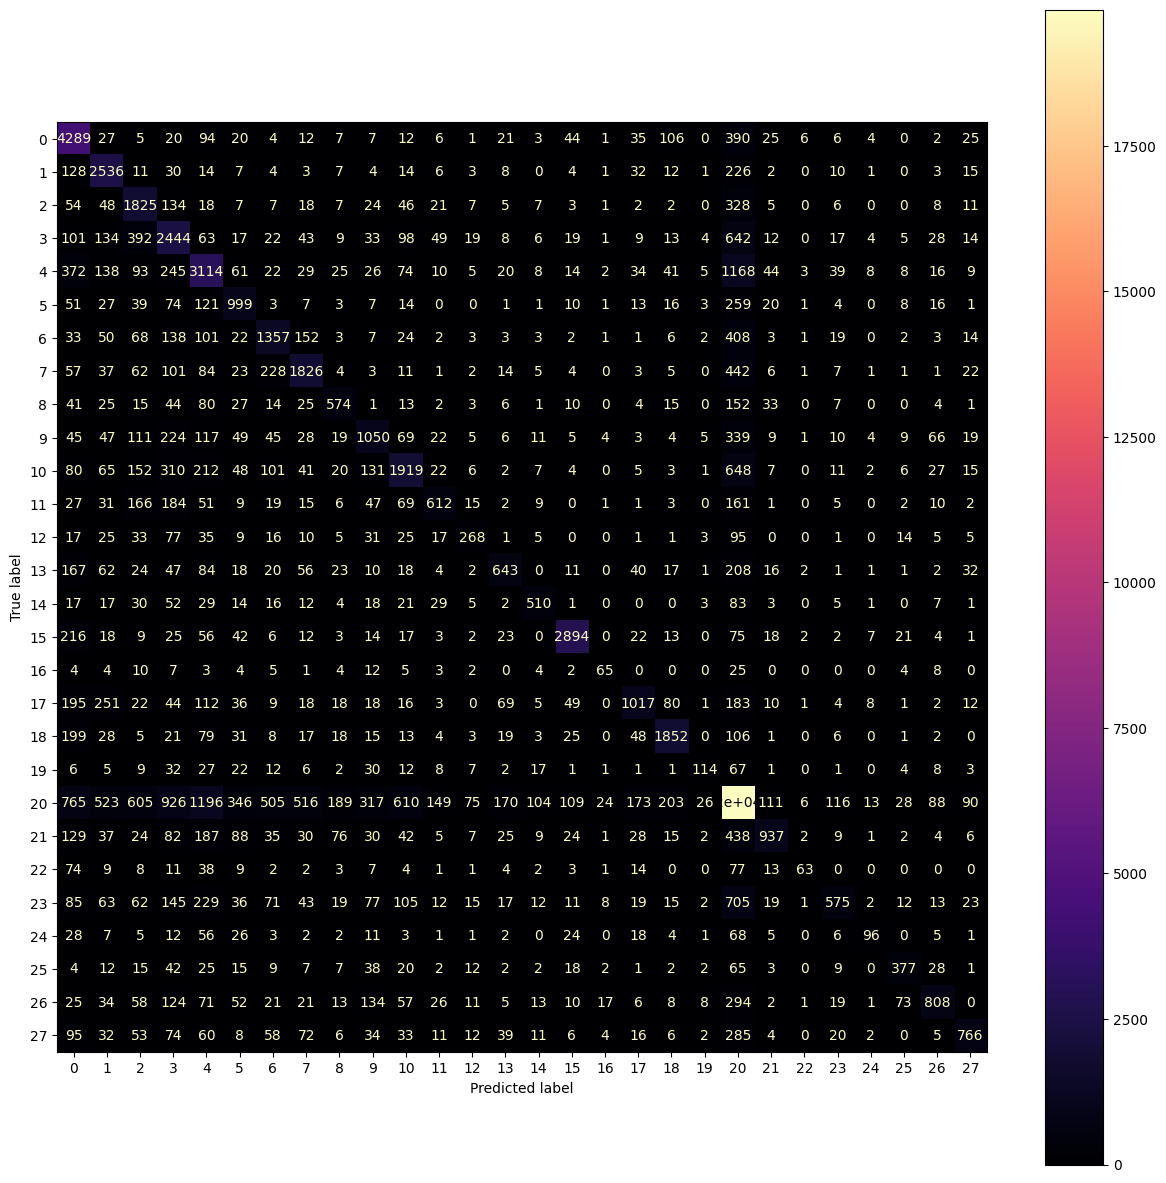

In [143]:
y_emo_predict = clf1.predict(X_test)

print(f"Score for Emotion: {clf1.score(X_test, yemo_test)}")
metrics(yemo_test, y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test, y_pred=y_emo_predict))
fig, ax = plt.subplots(figsize=(15, 15))
cmp.plot(ax=ax, cmap='magma')

Score for Sentiment: 0.7407985100686765
Accuracy: 0.7407985100686765
Precision (Weighted): 0.7479746651473562
F1 Score (Weighted): 0.7424099058145663
F1 Score (Macro): 0.7269614504517423
              precision    recall  f1-score   support

           0       0.61      0.71      0.65      9489
           1       0.70      0.79      0.74     19201
           2       0.73      0.70      0.72     27826
           3       0.84      0.76      0.80     29394

    accuracy                           0.74     85910
   macro avg       0.72      0.74      0.73     85910
weighted avg       0.75      0.74      0.74     85910



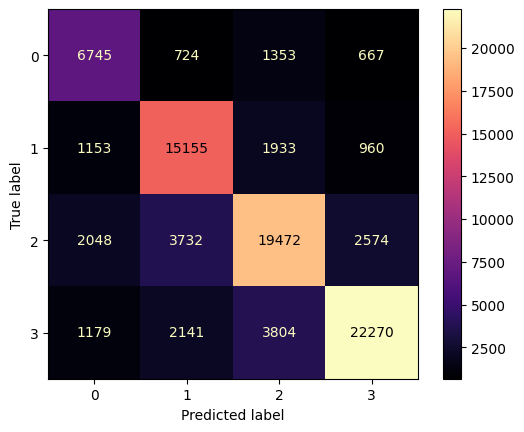

In [144]:
y_sent_predict = clf2.predict(X_test)

print(f"Score for Sentiment: {clf2.score(X_test, ysent_test)}")
metrics(ysent_test, y_sent_predict)
ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')

<h2>Multi-Layered Perceptron (neural network.MLPClassifier) using new test train split</h2>

<b>Did not converge timed out</b>

In [145]:
classifier = MLPClassifier()
skip=False
if(not skip):
    if (os.path.exists('models/new_split/MLP1_model_new_split.pickle')):
        pickle_in = open('models/new_split/MLP1_model_new_split.pickle', 'rb')
        clf1 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        MLP1 = classifier.fit(X_train, yemo_train)
        with open('models/new_split/MLP1_model_new_split.pickle', 'wb') as f:
            pickle.dump(classifier, f)
        pickle_in = open('models/new_split/MLP1_model_new_split.pickle', 'rb')
        clf1 = pickle.load(pickle_in)

    if (os.path.exists('models/new_split/MLP2_model_new_split.pickle')):
        pickle_in = open('models/new_split/MLP2_model_new_split.pickle', 'rb')
        clf2 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        MLP2 = classifier.fit(X_train, ysent_train)
        with open('models/new_split/MLP2_model_new_split.pickle', 'wb') as f:
            pickle.dump(classifier, f)
        pickle_in = open('models/new_split/MLP2_model_new_split.pickle', 'rb')
        clf2 = pickle.load(pickle_in)
else:
    print("skipped")

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


pickle file used
pickle file used


Score for Emotion: 0.59857990920731
Accuracy: 0.59857990920731
Precision (Weighted): 0.5909014163368222
F1 Score (Weighted): 0.5905040796252045
F1 Score (Macro): 0.5238731919276091
              precision    recall  f1-score   support

           0       0.64      0.72      0.67      5172
           1       0.65      0.69      0.67      3082
           2       0.57      0.46      0.51      2594
           3       0.48      0.40      0.43      4206
           4       0.55      0.38      0.45      5633
           5       0.51      0.47      0.49      1699
           6       0.57      0.40      0.47      2428
           7       0.58      0.57      0.58      2951
           8       0.47      0.55      0.51      1097
           9       0.49      0.37      0.43      2326
          10       0.52      0.47      0.50      3845
          11       0.50      0.47      0.48      1448
          12       0.41      0.50      0.45       699
          13       0.50      0.44      0.47      1510
        

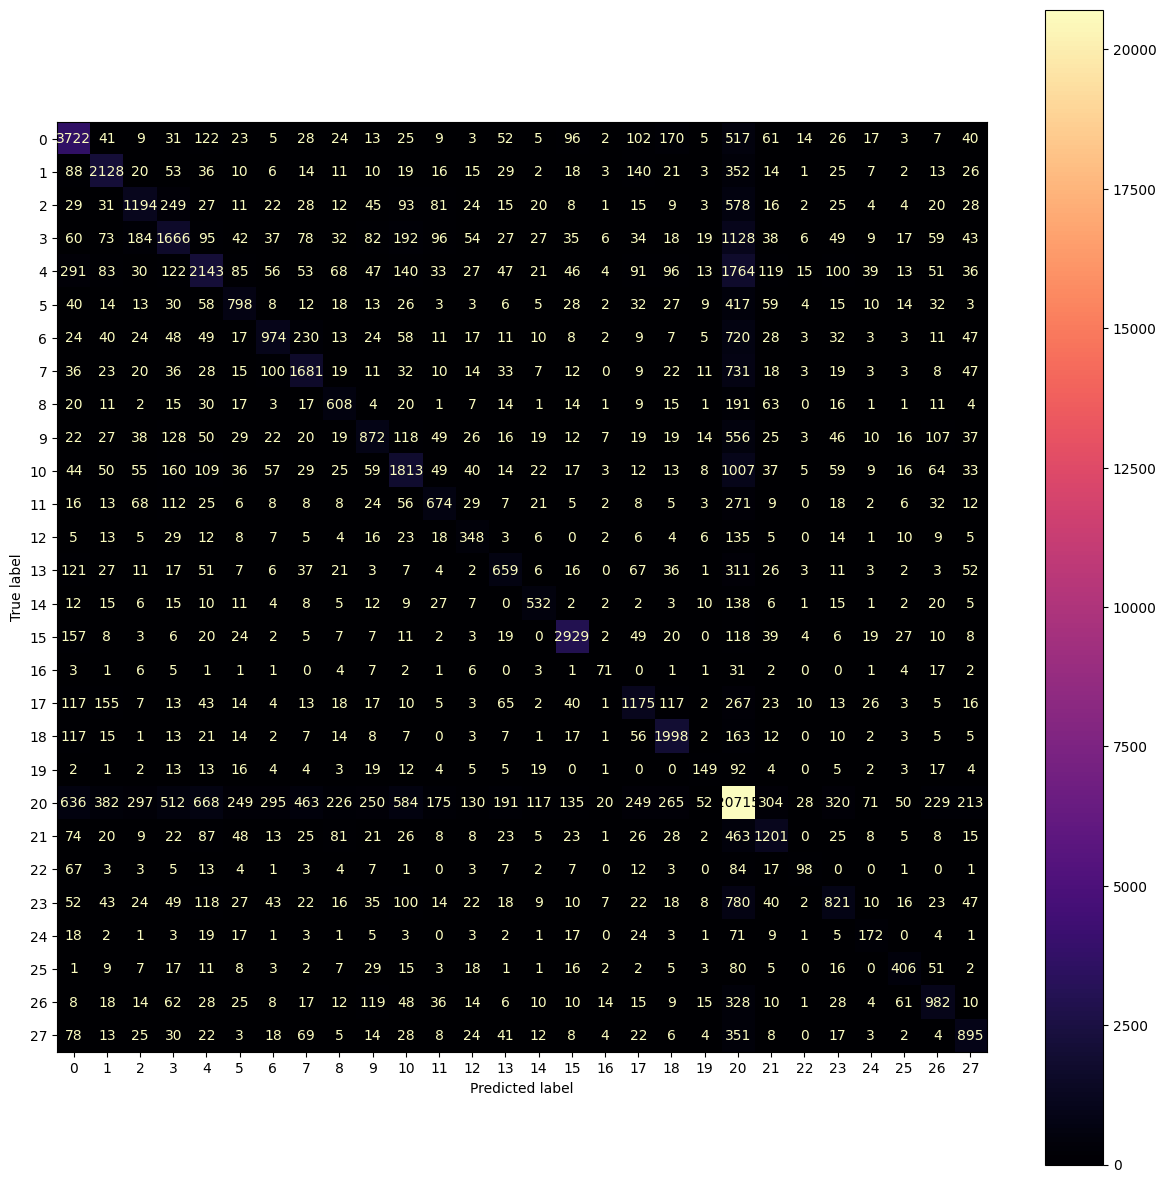

In [146]:

if (os.path.exists('models/new_split/MLP1_model_new_split.pickle') and not skip):
    y_emo_predict = clf1.predict(X_test)
    print(f"Score for Emotion: {clf1.score(X_test, yemo_test)}")
    metrics(yemo_test, y_emo_predict)
    cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test, y_pred=y_emo_predict))
    fig, ax = plt.subplots(figsize=(15, 15))
    cmp.plot(ax=ax, cmap='magma')
else:
    print("skipped")

Score for Sentiment: 0.7264230008148062
Accuracy: 0.7264230008148062
Precision (Weighted): 0.7254088457381329
F1 Score (Weighted): 0.7255909741208468
F1 Score (Macro): 0.7054654338074396
              precision    recall  f1-score   support

           0       0.65      0.58      0.61      9489
           1       0.70      0.73      0.72     19201
           2       0.70      0.70      0.70     27826
           3       0.79      0.80      0.79     29394

    accuracy                           0.73     85910
   macro avg       0.71      0.70      0.71     85910
weighted avg       0.73      0.73      0.73     85910



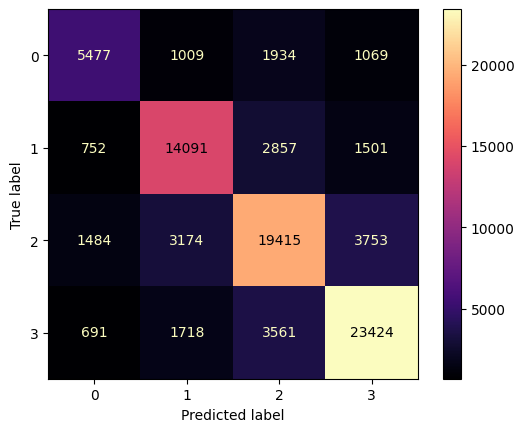

In [147]:
if (os.path.exists('models/new_split/MLP1_model_new_split.pickle') and not skip):
    y_sent_predict = clf2.predict(X_test)

    print(f"Score for Sentiment: {clf2.score(X_test, ysent_test)}")
    metrics(ysent_test, y_sent_predict)
    ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')
else:
    print("skipped")

<h2>Multinomial Naive Bayes Classifier found using GridSearchCV and new test train split</h2>

input parameter requires a model object

using the following alpha parameters 0.5,0,0.36,1

In [148]:
parameters = {"alpha": (0.5, 0, 0.36, 1)}
clfMNB = MultinomialNB()

classifier = GridSearchCV(estimator=clfMNB, param_grid=parameters, n_jobs=-1)

if (os.path.exists('models/new_split/MNB1GridCV_model_new_split.pickle')):
    pickle_in = open('models/new_split/MNB1GridCV_model_new_split.pickle', 'rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/new_split/MNB1GridCV_model_new_split.pickle', 'wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/new_split/MNB1GridCV_model_new_split.pickle', 'rb')
    clf1 = pickle.load(pickle_in)

if (os.path.exists('models/new_split/MNB2GridCV_model_new_split.pickle')):
    pickle_in = open('models/new_split/MNB2GridCV_model_new_split.pickle', 'rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, ysent_train)
    with open('models/new_split/MNB2GridCV_model_new_split.pickle', 'wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/new_split/MNB2GridCV_model_new_split.pickle', 'rb')
    clf2 = pickle.load(pickle_in)


pickle file used
pickle file used


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator MultinomialNB from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


Best estimator (Emotion): MultinomialNB(alpha=0.5), Best Score: 0.3905984755012737
Accuracy: 0.4880921895006402
Precision (Weighted): 0.49127802602901244
F1 Score (Weighted): 0.4578730229657269
F1 Score (Macro): 0.3472135966754609
              precision    recall  f1-score   support

           0       0.54      0.62      0.58      5172
           1       0.59      0.59      0.59      3082
           2       0.49      0.34      0.40      2594
           3       0.42      0.25      0.32      4206
           4       0.44      0.24      0.31      5633
           5       0.38      0.28      0.32      1699
           6       0.46      0.24      0.31      2428
           7       0.51      0.32      0.39      2951
           8       0.55      0.21      0.30      1097
           9       0.46      0.19      0.27      2326
          10       0.42      0.28      0.33      3845
          11       0.51      0.27      0.35      1448
          12       0.61      0.13      0.22       699
          13

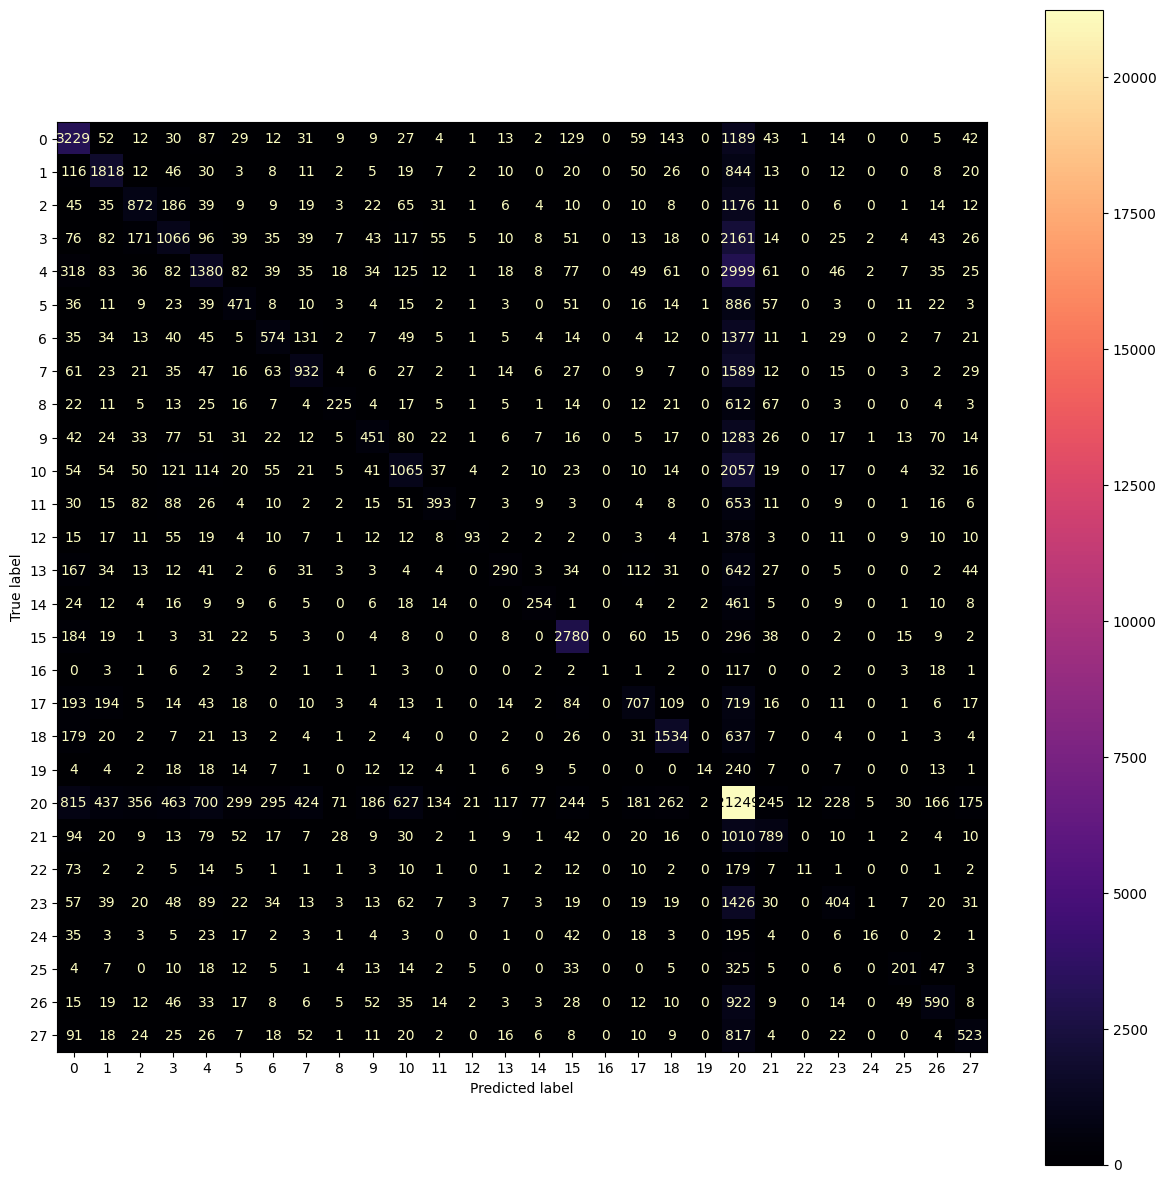

In [149]:
y_emo_predict = clf1.best_estimator_.predict(X_test)

print(f"Best estimator (Emotion): {clf1.best_estimator_}, Best Score: {clf1.best_score_}")
metrics(yemo_test, y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test, y_pred=y_emo_predict))
fig, ax = plt.subplots(figsize=(15, 15))
cmp.plot(ax=ax, cmap='magma')


Best estimator (Sentiment): MultinomialNB(alpha=1), Best Score: 0.543696292227927
Accuracy: 0.618007216854848
Precision (Weighted): 0.6131399039437113
F1 Score (Weighted): 0.6120770692286888
F1 Score (Macro): 0.5804252155193406
              precision    recall  f1-score   support

           0       0.55      0.35      0.43      9489
           1       0.61      0.62      0.61     19201
           2       0.58      0.57      0.57     27826
           3       0.67      0.75      0.71     29394

    accuracy                           0.62     85910
   macro avg       0.60      0.57      0.58     85910
weighted avg       0.61      0.62      0.61     85910



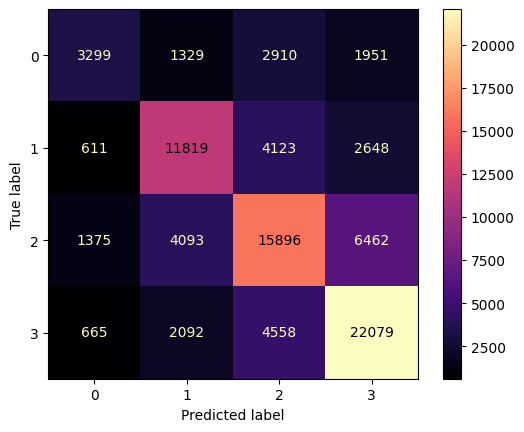

In [150]:
y_sent_predict = clf2.best_estimator_.predict(X_test)

print(f"Best estimator (Sentiment): {clf2.best_estimator_}, Best Score: {clf2.best_score_}")
metrics(ysent_test, y_sent_predict)
ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')

<h2>DecisionTree Classifier found using GridSearchCV and new test train split </h2>

input parameter requires a model object

using the various value for the following parameters: criterion, max_depth, min_samples

In [151]:
parameters = {"criterion": ("gini", "entropy"), "max_depth": (100, 3), "min_samples_split": (12, 5, 30)}
clfDT = DecisionTreeClassifier()

classifier = GridSearchCV(estimator=clfDT, param_grid=parameters, n_jobs=-1)

if (os.path.exists('models/new_split/DT1GridCV_model_new_split.pickle')):
    pickle_in = open('models/new_split/DT1GridCV_model_new_split.pickle', 'rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/new_split/DT1GridCV_model_new_split.pickle', 'wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/new_split/DT1GridCV_model_new_split.pickle', 'rb')
    clf1 = pickle.load(pickle_in)

if (os.path.exists('models/new_split/DT2GridCV_model_new_split.pickle')):
    pickle_in = open('models/new_split/DT2GridCV_model_new_split.pickle', 'rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, ysent_train)
    with open('models/new_split/DT2GridCV_model_new_split.pickle', 'wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/new_split/DT2GridCV_model_new_split.pickle', 'rb')
    clf2 = pickle.load(pickle_in)


pickle file used
pickle file used


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


Best estimator (Emotion): DecisionTreeClassifier(max_depth=100, min_samples_split=30), Best Score: 0.3984285880572692
Accuracy: 0.47008497264579213
Precision (Weighted): 0.460210590324484
F1 Score (Weighted): 0.42465096207250363
F1 Score (Macro): 0.31974850647248304
              precision    recall  f1-score   support

           0       0.54      0.52      0.53      5172
           1       0.57      0.59      0.58      3082
           2       0.43      0.27      0.33      2594
           3       0.29      0.15      0.20      4206
           4       0.35      0.15      0.21      5633
           5       0.36      0.16      0.22      1699
           6       0.41      0.21      0.27      2428
           7       0.47      0.23      0.30      2951
           8       0.43      0.25      0.32      1097
           9       0.35      0.14      0.20      2326
          10       0.33      0.16      0.21      3845
          11       0.42      0.20      0.27      1448
          12       0.46      0

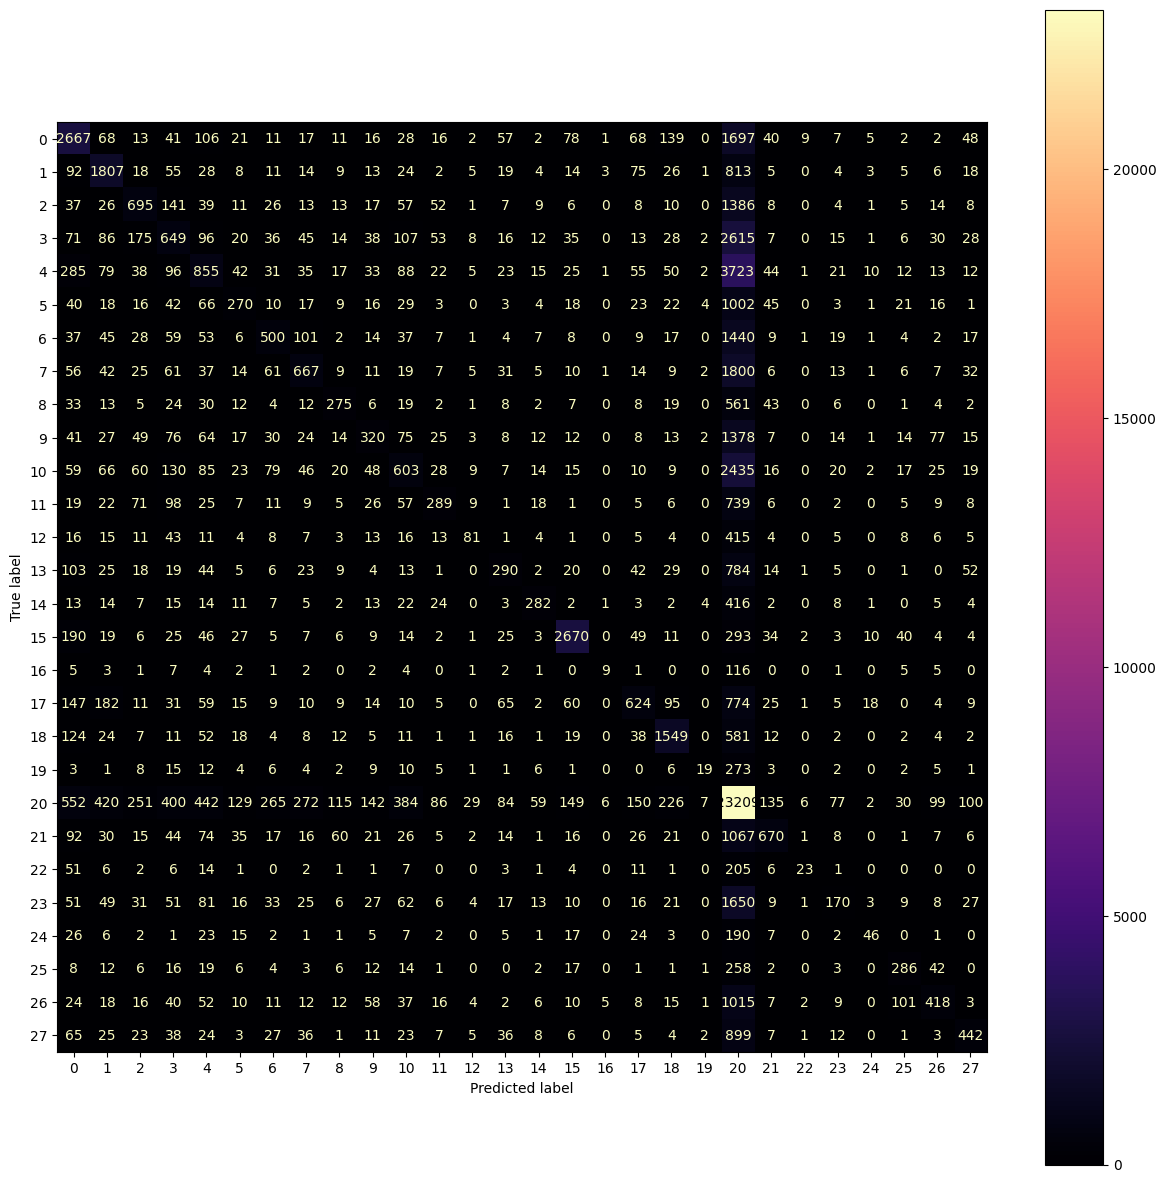

In [152]:
y_emo_predict = clf1.best_estimator_.predict(X_test)

print(f"Best estimator (Emotion): {clf1.best_estimator_}, Best Score: {clf1.best_score_}")
metrics(yemo_test, y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test, y_pred=y_emo_predict))
fig, ax = plt.subplots(figsize=(15, 15))
cmp.plot(ax=ax, cmap='magma')


Best estimator (Sentiment): DecisionTreeClassifier(max_depth=100, min_samples_split=5), Best Score: 0.49976719823070653
Accuracy: 0.5854382493306949
Precision (Weighted): 0.6302948830762424
F1 Score (Weighted): 0.5837108795822785
F1 Score (Macro): 0.5509907105991707
              precision    recall  f1-score   support

           0       0.52      0.35      0.42      9489
           1       0.65      0.45      0.53     19201
           2       0.48      0.78      0.59     27826
           3       0.80      0.57      0.66     29394

    accuracy                           0.59     85910
   macro avg       0.61      0.54      0.55     85910
weighted avg       0.63      0.59      0.58     85910



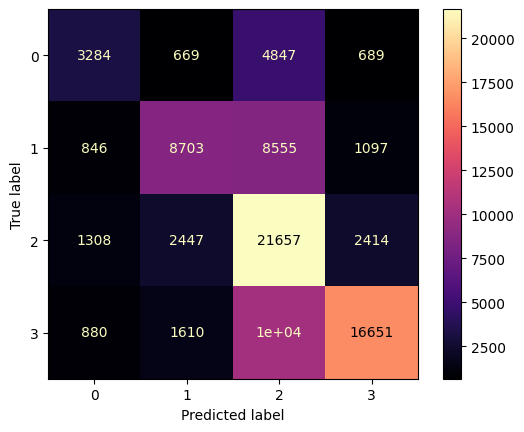

In [153]:
y_sent_predict = clf2.best_estimator_.predict(X_test)

print(f"Best estimator (Sentiment): {clf2.best_estimator_}, Best Score: {clf2.best_score_}")
metrics(ysent_test, y_sent_predict)
ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')

<h2>Multi-Layered Perceptron found using GridSearchCV and new test train split</h2>

input parameter requires a model object

using the various value for the following parameters: activation, architectures, solvers
Hidden layers <a href="https://datascience.stackexchange.com/questions/19768/how-to-implement-pythons-mlpclassifier-with-gridsearchcv">Link</a>

<b>Unable to converge</b>


In [154]:
parameters = {"activation":("identity", "logistic", "tanh", "relu"),"hidden_layer_sizes":((5,5),(5,10)), "solver":("adam","sgd")}
#currently 5 neurons then 5 neurons and 5 neurons then 10 neurons in the hidden layer
clfMLP = MLPClassifier(early_stopping=True,verbose=True, max_iter=5)
classifier = GridSearchCV(estimator=clfMLP, param_grid=parameters, n_jobs=-1)
skip=False
if(not skip):
    if (os.path.exists('models/new_split/MLP1GridCV_model_new_split.pickle')):
        pickle_in = open('models/new_split/MLP1GridCV_model_new_split.pickle','rb')
        clf1 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        classifier = classifier.fit(X_train, yemo_train)
        with open('models/new_split/MLP1GridCV_model_new_split.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/new_split/MLP1GridCV_model_new_split.pickle','rb')
        clf1 = pickle.load(pickle_in)

    if (os.path.exists('models/new_split/MLP2GridCV_model_new_split.pickle')):
        pickle_in = open('models/new_split/MLP2GridCV_model_new_split.pickle','rb')
        clf2 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        classifier = classifier.fit(X_train,ysent_train)
        with open('models/new_split/MLP2GridCV_model_new_split.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/new_split/MLP2GridCV_model_new_split.pickle','rb')
        clf2 = pickle.load(pickle_in)
else:
    print("skipped")

pickle file used
pickle file used


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.1.2 wh

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.4370620416715167
Precision (Weighted): 0.3882173852315286
F1 Score (Weighted): 0.3442802577837362
F1 Score (Macro): 0.20130607061634861


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0       0.46      0.55      0.50      5172
           1       0.55      0.60      0.57      3082
           2       0.39      0.09      0.15      2594
           3       0.29      0.02      0.03      4206
           4       0.42      0.06      0.10      5633
           5       0.23      0.04      0.07      1699
           6       0.35      0.10      0.15      2428
           7       0.27      0.13      0.18      2951
           8       0.42      0.13      0.20      1097
           9       0.00      0.00      0.00      2326
          10       0.25      0.01      0.02      3845
          11       0.56      0.10      0.18      1448
          12       1.00      0.00      0.00       699
          13       0.37      0.02      0.03      1510
          14       0.00      0.00      0.00       880
          15       0.79      0.77      0.78      3505
          16       0.00      0.00      0.00       172
          17       0.33    

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.46      0.55      0.50      5172
           1       0.55      0.60      0.57      3082
           2       0.39      0.09      0.15      2594
           3       0.29      0.02      0.03      4206
           4       0.42      0.06      0.10      5633
           5       0.23      0.04      0.07      1699
           6       0.35      0.10      0.15      2428
           7       0.27      0.13      0.18      2951
           8       0.42      0.13      0.20      1097
           9       0.00      0.00      0.00      2326
          10       0.25      0.01      0.02      3845
          11       0.56      0.10      0.18      1448
          12       1.00      0.00      0.00       699
          13       0.37      0.02      0.03      1510
          14       0.00      0.00      0.00       880
          15       0.79      0.77      0.78      3505
          16       0.00      0.00      0.00       172
          17       0.33    

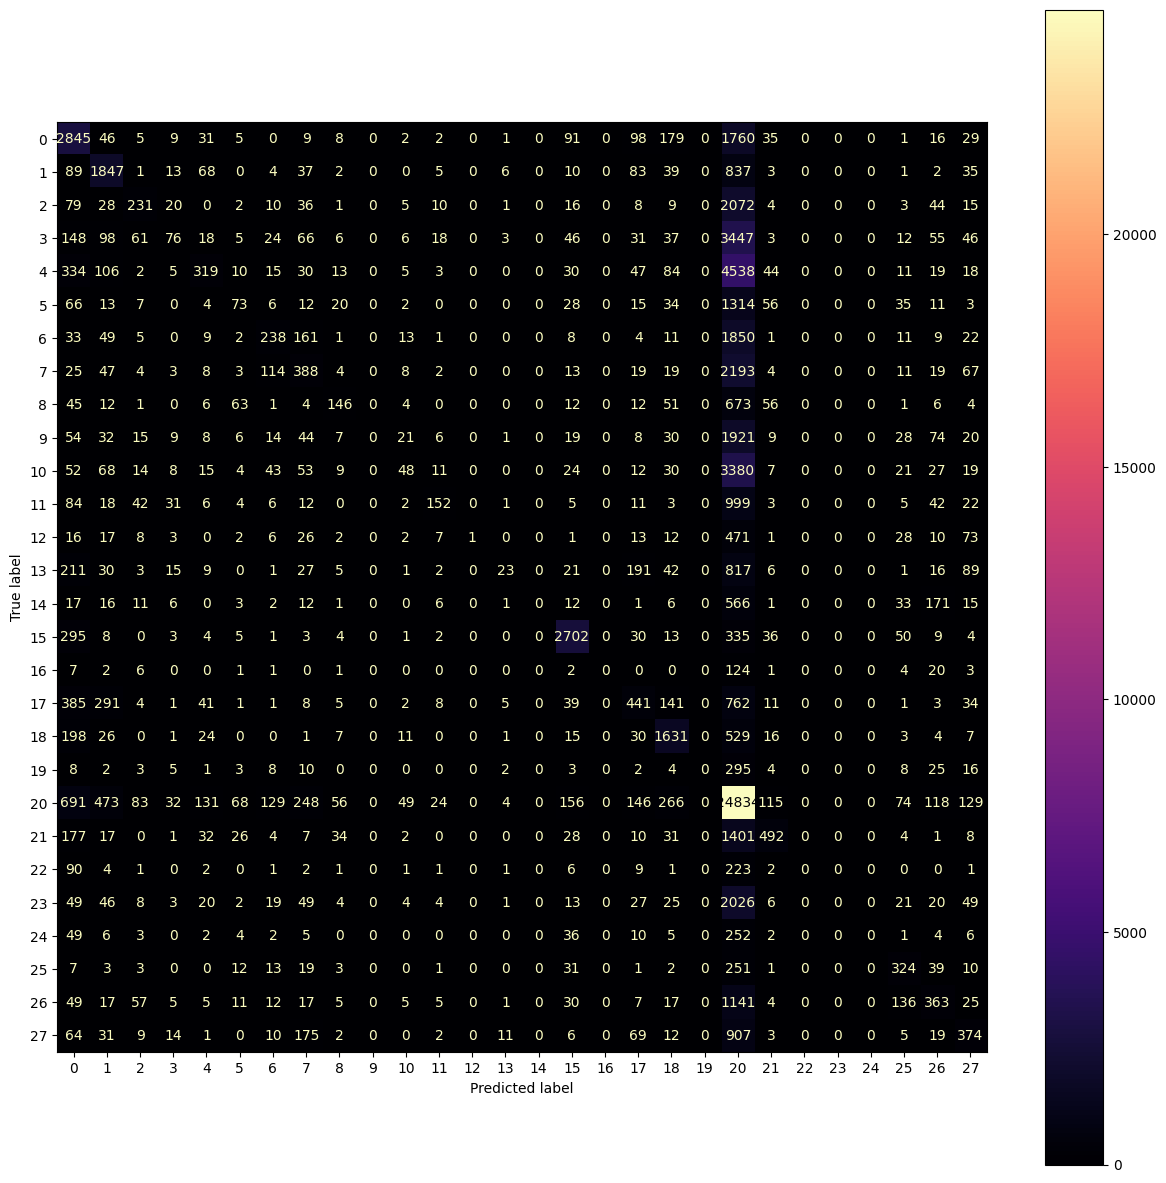

In [155]:
if (os.path.exists('models/new_split/MLP1GridCV_model_new_split.pickle') and not skip):
    y_emo_predict = clf1.best_estimator_.predict(X_test)
    metrics(yemo_test,y_emo_predict)
    print(f"Best estimator (Emotion): {clf1.best_estimator_}, Best Score: {clf1.best_score_}")
    metrics(yemo_test,y_emo_predict)
    cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test,y_pred= y_emo_predict))
    fig, ax = plt.subplots(figsize=(15,15))
    cmp.plot(ax=ax,cmap='magma')
else:
    print("skipped")

Accuracy: 0.6051099988359911
Precision (Weighted): 0.6044068534991455
F1 Score (Weighted): 0.6011417194301629
F1 Score (Macro): 0.5639222008126572
              precision    recall  f1-score   support

           0       0.52      0.32      0.39      9489
           1       0.59      0.58      0.58     19201
           2       0.53      0.61      0.57     27826
           3       0.71      0.71      0.71     29394

    accuracy                           0.61     85910
   macro avg       0.59      0.55      0.56     85910
weighted avg       0.60      0.61      0.60     85910

Best estimator (Sentiment): MLPClassifier(activation='tanh', early_stopping=True, hidden_layer_sizes=(5, 5),
              max_iter=5, verbose=True), Best Score: 0.5505296240251426


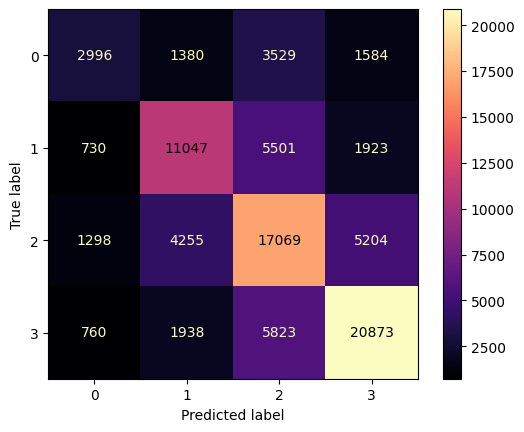

In [156]:
if (os.path.exists('models/new_split/MLP2GridCV_model_new_split.pickle') and not skip):
    y_sent_predict = clf2.best_estimator_.predict(X_test)
    metrics(ysent_test,y_sent_predict)
    print(f"Best estimator (Sentiment): {clf2.best_estimator_}, Best Score: {clf2.best_score_}")
    ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')
else:
    print("skipped")

<h3>3. Embedding as features</h3>

requires install of library gensim

pip install gensim

https://radimrehurek.com/gensim/models/word2vec.html


In [157]:
# result.most_similar("cat")

In [158]:
if (os.path.exists('models/word2vec.pickle')):
    pickle_in = open('models/word2vec.pickle','rb')
    word2vec = pickle.load(pickle_in)
    print("pickle file used")
else:
    model =gensim.downloader.load("word2vec-google-news-300")
    with open('models/word2vec.pickle','wb') as f:
        pickle.dump(model, f)

    pickle_in = open('models/word2vec.pickle','rb')
    word2vec = pickle.load(pickle_in)

pickle file used


In [159]:
nltk.download('punkt')
#post.str.lower()
tokenized_word = [word_tokenize(i) for i in post]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\girou\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [160]:
post_tokens = [post_tokens for post_tokens in tokenized_word] #http://librarycarpentry.org/lc-tdm/aio/index.html
print("Number of tokens in Reddit posts:")
tokens_list = []
for i in post_tokens:
    for j in i:
        tokens_list.append(j)
print(len(tokens_list))

Number of tokens in Reddit posts:
2642128


In [161]:
X_train_emb,X_test_emb, y_emo_train, y_emo_test, y_sent_train, y_sent_test= train_test_split(post_tokens, encodedEmo, encodedSentiment, test_size = 0.2, train_size=0.8)

In [162]:
model = gensim.downloader.load("word2vec-google-news-300")

post_tokens_training = []

# Cleaning Google model
for post in X_train_emb:
    clean_post = [] 
    for word in post:
        if word in model:
            clean_post.append(word)
        else:
            continue
    post_tokens_training.append(clean_post)


# Average embed calculation
average_embeds_train = []
for post in post_tokens_training:
    token_embeddings = []
    for word in post:
        token_embeddings.append(model[word]) 

    average_embeds_train.append(np.mean(token_embeddings,axis=0)) 



posts_tokens_in_model_test = [] 

# Cleaning Google model
for post in X_test_emb:
    clean_test = [] 
    for word in post:
        if word in model:
            clean_test.append(word)
        else:
            continue
    posts_tokens_in_model_test.append(clean_test)

    
# Average embed calculation
average_embeds_test = []
for post in posts_tokens_in_model_test:
    token_embeddings = []
    for word in post:
        token_embeddings.append(model[word]) 
    average_embeds_test.append(np.mean(token_embeddings,axis=0)) 


X_embed_avg_train = average_embeds_train
X_embed_avg_test = average_embeds_test
print(f"Shape of training set: {np.shape(X_embed_avg_train)}")
print(f"Shape of test set: {np.shape(X_embed_avg_test)}")

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Shape of training set: (137456,)
Shape of test set: (34364,)


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [163]:
#Cleaning training and test sets
# RUN TWICE
for i in range(2):
    print(f"Shape of test set: {np.shape(X_embed_avg_test)}")
    print(np.shape(y_emo_test))

    # Remove empty posts
    for i in range(len(X_embed_avg_train)):
        if i >= len(X_embed_avg_train):
            break
        if X_embed_avg_train[i].shape == (300,):
            continue
        else:
            X_embed_avg_train.pop(i)
            y_emo_train = np.delete(y_emo_train, i)
            y_sent_train = np.delete(y_sent_train, i)

    # Remove empty posts
    for i in range(len(X_embed_avg_test)):
        if i >= len(X_embed_avg_test):
            break
        if X_embed_avg_test[i].shape == (300,):
            continue
        else:
            X_embed_avg_test.pop(i)
            y_emo_test = np.delete(y_emo_test, i)
            y_sent_test = np.delete(y_sent_test, i)


    print(f"Shape of training set: {np.shape(X_embed_avg_train)}")
    print(f"Shape of test set: {np.shape(X_embed_avg_test)}")
    print(np.shape(y_emo_test))

    # Convert into np array
    for i in range(len(X_embed_avg_train)):
        X_embed_avg_train[i] = np.array(X_embed_avg_train[i])

    for i in range(len(X_embed_avg_test)):
        X_embed_avg_test[i] = np.array(X_embed_avg_test[i])

Shape of test set: (34364,)
(34364,)
Shape of training set: (137387,)
Shape of test set: (34347, 300)
(34347,)
Shape of test set: (34347, 300)
(34347,)
Shape of training set: (137386, 300)
Shape of test set: (34347, 300)
(34347,)


In [164]:
# classifier = MLPClassifier()
classifier = MLPClassifier(max_iter=100)

if (os.path.exists('models/Embeddings_MLP_model.pickle')):
    pickle_in = open('models/Embeddings_MLP_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print('pickle file used')
else:
    EMLP = classifier.fit(X_embed_avg_train, y_emo_train)
    with open('models/Embeddings_MLP_model.pickle','wb') as f:
            pickle.dump(EMLP, f)
    pickle_in = open('models/Embeddings_MLP_model.pickle','rb')
    clf1 = pickle.load(pickle_in)

        
if (os.path.exists('models/Embeddings_MLP_model2.pickle')):
    pickle_in = open('models/Embeddings_MLP_model2.pickle','rb')
    clf2 = pickle.load(pickle_in)
    print('pickle file used')
else:
    EMLP2 = classifier.fit(X_embed_avg_train, y_sent_train)
    with open('models/Embeddings_MLP_model2.pickle','wb') as f:
            pickle.dump(EMLP2, f)
    pickle_in = open('models/Embeddings_MLP_model2.pickle','rb')
    clf2 = pickle.load(pickle_in)


pickle file used
pickle file used


In [165]:
print(np.shape(X_embed_avg_train))
print(np.shape(y_emo_train))

(137386, 300)
(137386,)


Score for Emotion: 0.40676041575683464
Accuracy: 0.40676041575683464
Precision (Weighted): 0.3788562650862727
F1 Score (Weighted): 0.3120967919097087
F1 Score (Macro): 0.1742049491906664
              precision    recall  f1-score   support

           0       0.50      0.42      0.46      2092
           1       0.46      0.37      0.41      1221
           2       0.34      0.18      0.23      1041
           3       0.20      0.02      0.04      1679
           4       0.44      0.03      0.06      2221
           5       0.30      0.05      0.08       704
           6       0.48      0.01      0.03       985
           7       0.37      0.09      0.15      1174
           8       0.50      0.08      0.13       420
           9       0.23      0.01      0.01       964
          10       0.26      0.04      0.07      1519
          11       0.48      0.11      0.18       564
          12       0.00      0.00      0.00       283
          13       0.37      0.03      0.05       585
  

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_s

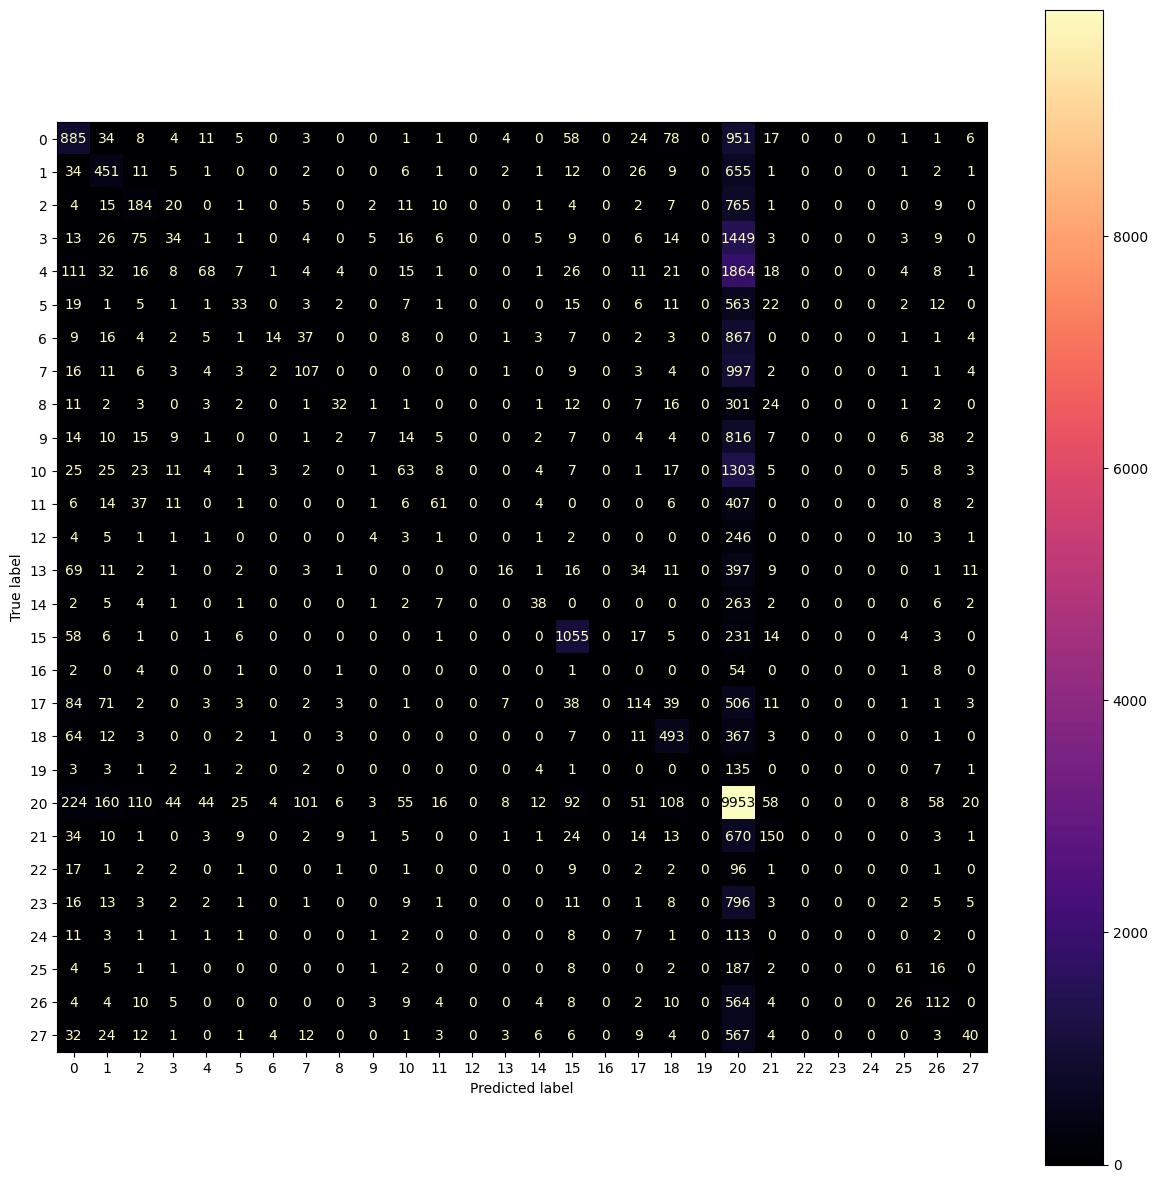

In [166]:
y_emo_predict = clf1.predict(X_embed_avg_test)
print(f"Score for Emotion: {clf1.score(X_embed_avg_test, y_emo_test)}")
metrics(y_emo_test, y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=y_emo_test, y_pred=y_emo_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax, cmap='magma')

Score for Sentiments: 0.534486272454654
Accuracy: 0.534486272454654
Precision (Weighted): 0.5343130685305912
F1 Score (Weighted): 0.5184418862510138
F1 Score (Macro): 0.4612670561521265
              precision    recall  f1-score   support

           0       0.51      0.13      0.20      3770
           1       0.52      0.43      0.47      7677
           2       0.47      0.59      0.52     11160
           3       0.62      0.68      0.64     11740

    accuracy                           0.53     34347
   macro avg       0.53      0.46      0.46     34347
weighted avg       0.53      0.53      0.52     34347



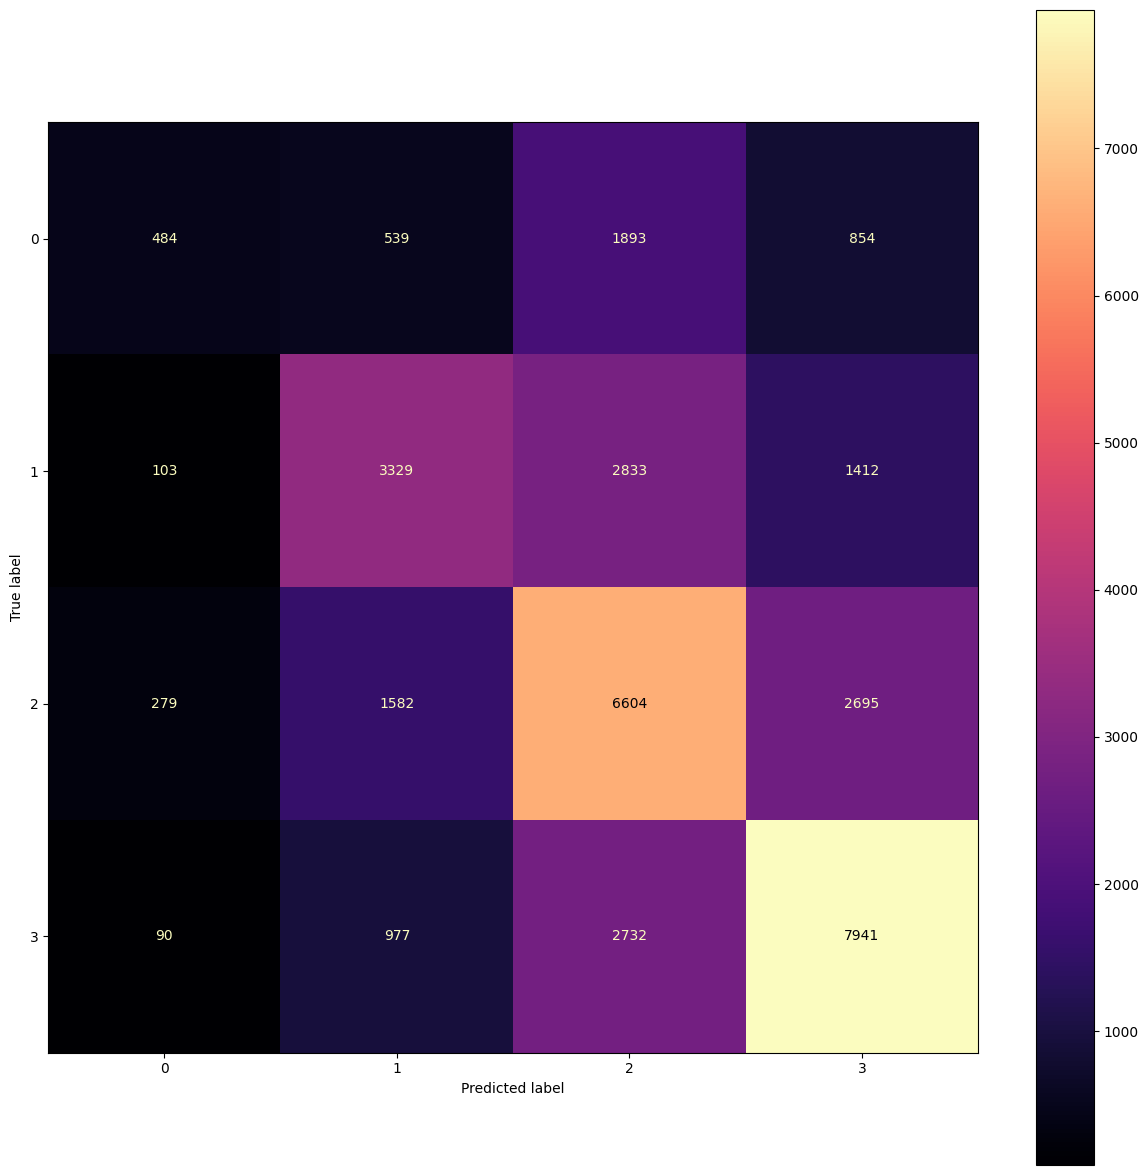

In [167]:
y_sent_predict = clf2.predict(X_embed_avg_test)
print(f"Score for Sentiments: {clf2.score(X_embed_avg_test, y_sent_test)}")
metrics(y_sent_test, y_sent_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=y_sent_test, y_pred=y_sent_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax, cmap='magma')

In [168]:
print(np.shape(X_embed_avg_train))

(137386, 300)


In [169]:
parameters = {"activation":("identity", "logistic", "tanh", "relu"),"hidden_layer_sizes":((5,5),(5,10)), "solver":("adam","sgd")}
#currently 5 neurons then 5 neurons and 5 neurons then 10 neurons in the hidden layer
clfMLP = MLPClassifier(early_stopping=True,verbose=True, max_iter=100)
classifier = GridSearchCV(estimator=clfMLP, param_grid=parameters, n_jobs=-1)
skip=False
if(not skip):
    if (os.path.exists('models/new_split/MLP1GridCV_model_emb.pickle')):
        pickle_in = open('models/new_split/MLP1GridCV_model_emb.pickle','rb')
        clf1 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        X_embed_avg_train, y_emo_train
        classifier = classifier.fit(X_embed_avg_train, y_emo_train)
        with open('models/new_split/MLP1GridCV_model_emb.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/new_split/MLP1GridCV_model_emb.pickle','rb')
        clf1 = pickle.load(pickle_in)

    if (os.path.exists('models/new_split/MLP2GridCV_model_emb.pickle')):
        pickle_in = open('models/new_split/MLP2GridCV_model_emb.pickle','rb')
        clf2 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        classifier = classifier.fit(X_embed_avg_train,y_sent_train)
        with open('models/new_split/MLP2GridCV_model_emb.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/new_split/MLP2GridCV_model_emb.pickle','rb')
        clf2 = pickle.load(pickle_in)
else:
    print("skipped")

pickle file used
pickle file used


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.1.2 wh

Accuracy: 0.3878359099775817
Precision (Weighted): 0.25383071639530835
F1 Score (Weighted): 0.27016455551657853
F1 Score (Macro): 0.1220581025419878
              precision    recall  f1-score   support

           0       0.44      0.43      0.44      2092
           1       0.37      0.38      0.37      1221
           2       0.29      0.10      0.15      1041
           3       0.00      0.00      0.00      1679
           4       0.00      0.00      0.00      2221
           5       0.33      0.00      0.01       704
           6       0.00      0.00      0.00       985
           7       0.20      0.00      0.00      1174
           8       0.00      0.00      0.00       420
           9       0.00      0.00      0.00       964
          10       0.00      0.00      0.00      1519
          11       0.36      0.05      0.08       564
          12       0.00      0.00      0.00       283
          13       0.00      0.00      0.00       585
          14       0.00      0.00      0

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_s

              precision    recall  f1-score   support

           0       0.44      0.43      0.44      2092
           1       0.37      0.38      0.37      1221
           2       0.29      0.10      0.15      1041
           3       0.00      0.00      0.00      1679
           4       0.00      0.00      0.00      2221
           5       0.33      0.00      0.01       704
           6       0.00      0.00      0.00       985
           7       0.20      0.00      0.00      1174
           8       0.00      0.00      0.00       420
           9       0.00      0.00      0.00       964
          10       0.00      0.00      0.00      1519
          11       0.36      0.05      0.08       564
          12       0.00      0.00      0.00       283
          13       0.00      0.00      0.00       585
          14       0.00      0.00      0.00       334
          15       0.63      0.74      0.68      1402
          16       0.00      0.00      0.00        72
          17       0.28    

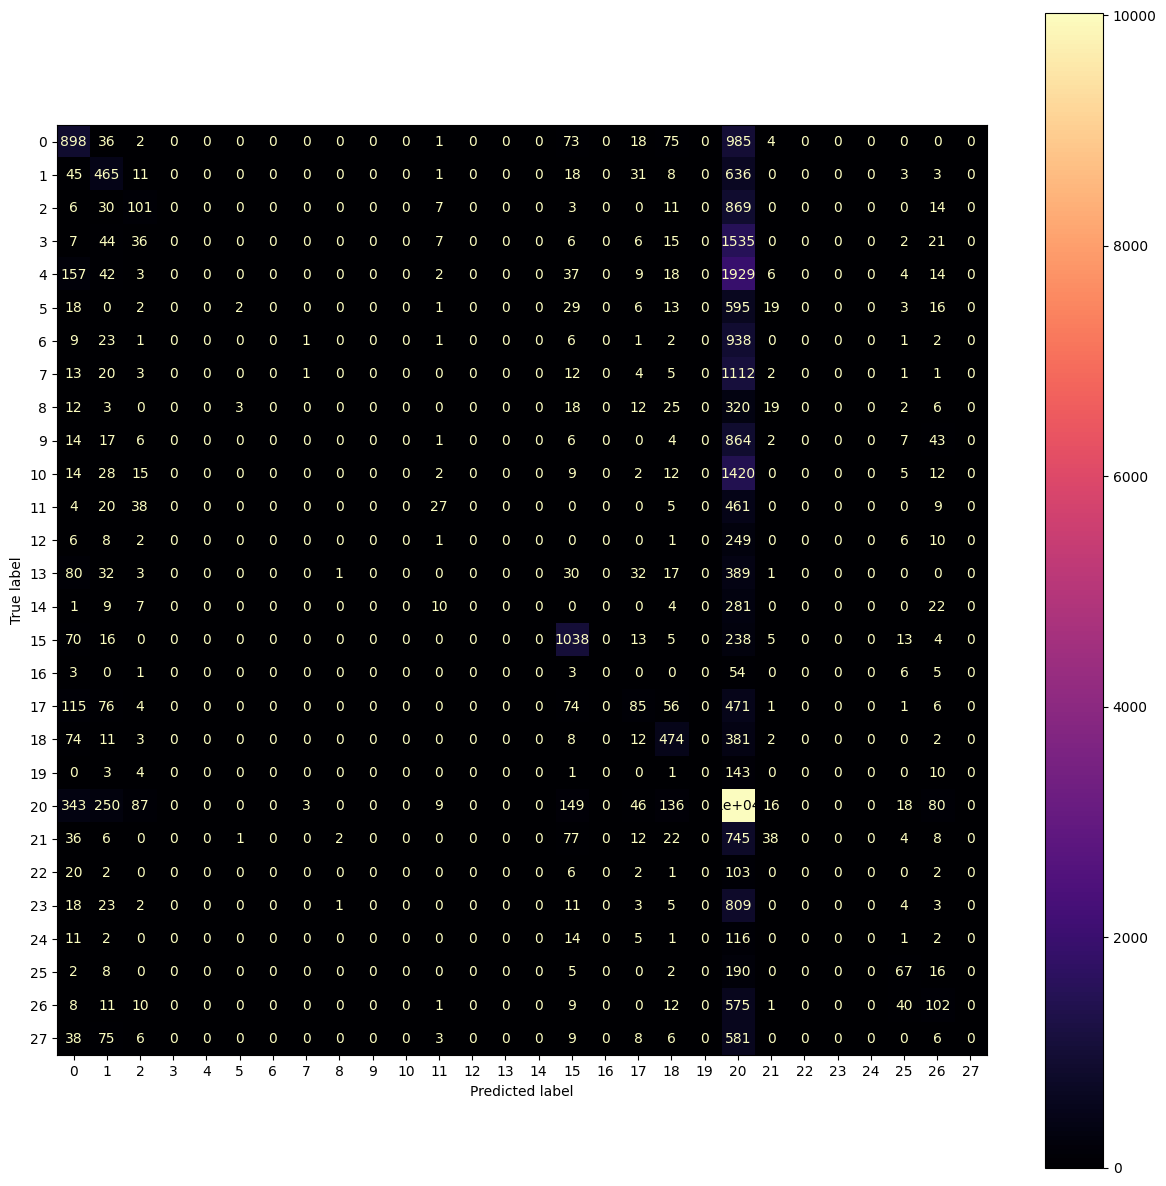

In [170]:
if (os.path.exists('models/new_split/MLP1GridCV_model_emb.pickle') and not skip):
    y_emo_predict = clf1.best_estimator_.predict(X_embed_avg_test)
    metrics(y_emo_test,y_emo_predict)
    print(f"Best estimator (Emotion): {clf1.best_estimator_}, Best Score: {clf1.best_score_}")
    metrics(y_emo_test,y_emo_predict)
    cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=y_emo_test,y_pred= y_emo_predict))
    fig, ax = plt.subplots(figsize=(15,15))
    cmp.plot(ax=ax,cmap='magma')
else:
    print("skipped")

Accuracy: 0.528954493842257
Precision (Weighted): 0.5286138750581487
F1 Score (Weighted): 0.5194281396686699
F1 Score (Macro): 0.4679402991192396
              precision    recall  f1-score   support

           0       0.45      0.16      0.23      3770
           1       0.48      0.49      0.49      7677
           2       0.47      0.57      0.51     11160
           3       0.64      0.63      0.64     11740

    accuracy                           0.53     34347
   macro avg       0.51      0.46      0.47     34347
weighted avg       0.53      0.53      0.52     34347

Best estimator (Sentiment): MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(5, 10), max_iter=100, verbose=True), Best Score: 0.5237589168729073


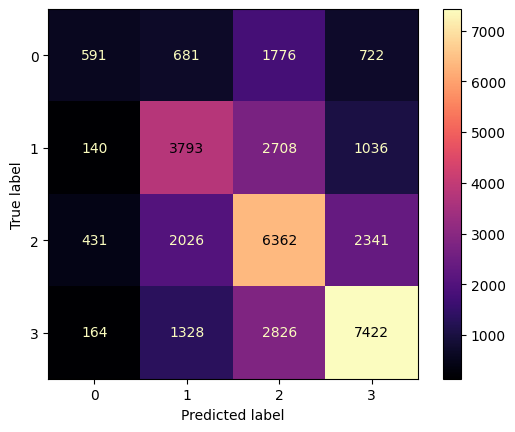

In [172]:
if (os.path.exists('models/new_split/MLP2GridCV_model_emb.pickle') and not skip):
    y_sent_predict = clf2.best_estimator_.predict(X_embed_avg_test)
    metrics(y_sent_test,y_sent_predict)
    print(f"Best estimator (Sentiment): {clf2.best_estimator_}, Best Score: {clf2.best_score_}")
    ConfusionMatrixDisplay.from_predictions(y_true=y_sent_test, y_pred=y_sent_predict, cmap='magma')
else:
    print("skipped")

In [173]:
if (os.path.exists('models/twitter.pickle')):
    pickle_in = open('models/twitter.pickle','rb')
    twitter = pickle.load(pickle_in)
    print("pickle file used")
else:
    model =gensim.downloader.load("glove-twitter-100")
    with open('models/twitter.pickle','wb') as f:
        pickle.dump(model, f)

    pickle_in = open('models/twitter.pickle','rb')
    twitter = pickle.load(pickle_in)

pickle file used


In [174]:
model = gensim.downloader.load("glove-twitter-100")
X_train_emb,X_test_emb, y_emo_train, y_emo_test, y_sent_train, y_sent_test= train_test_split(post_tokens, encodedEmo, encodedSentiment, test_size = 0.2, train_size=0.8)
post_tokens_training = [] 

# Cleaning Twitter model
for post in X_train_emb:
    clean_post = [] 
    for word in post:
        if word in model:
            clean_post.append(word)
        else:
            continue
    post_tokens_training.append(clean_post)


# Average embed calculation
average_embeds_train = []
for post in post_tokens_training:
    token_embeddings = []
    for word in post:
        token_embeddings.append(model[word]) 
   
    average_embeds_train.append(np.mean(token_embeddings,axis=0)) 


posts_tokens_in_model_test = [] 

# Cleaning Twitter model
for post in X_test_emb:
    clean_test = [] 
    for word in post:
        if word in model:
            clean_test.append(word)
        else:
            continue
    posts_tokens_in_model_test.append(clean_test)

    
# Average embed calculation
average_embeds_test = []
for post in posts_tokens_in_model_test:
    token_embeddings = []
    for word in post:
        token_embeddings.append(model[word]) 
    average_embeds_test.append(np.mean(token_embeddings,axis=0))


X_embed_avg_train = average_embeds_train
X_embed_avg_test = average_embeds_test
print(f"Shape of training set: {np.shape(X_embed_avg_train)}")
print(f"Shape of test set: {np.shape(X_embed_avg_test)}")

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Shape of training set: (137456,)
Shape of test set: (34364,)


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [175]:
# Cleaning training and test sets
# RUN TWICE
for i in range(2):
    print(f"Shape of test set: {np.shape(X_embed_avg_test)}")
    print(np.shape(y_emo_test))

    # Remove empty posts
    for i in range(len(X_embed_avg_train)):
        if i >= len(X_embed_avg_train):
            break
        if X_embed_avg_train[i].shape == (100,):
            continue
        else:
            X_embed_avg_train.pop(i)
            y_emo_train = np.delete(y_emo_train, i)
            y_sent_train = np.delete(y_sent_train, i)

    # Remove empty posts
    for i in range(len(X_embed_avg_test)):
        if i >= len(X_embed_avg_test):
            break
        if X_embed_avg_test[i].shape == (100,):
            continue
        else:
            X_embed_avg_test.pop(i)
            y_emo_test = np.delete(y_emo_test, i)
            y_sent_test = np.delete(y_sent_test, i)


    print(f"Shape of training set: {np.shape(X_embed_avg_train)}")
    print(f"Shape of test set: {np.shape(X_embed_avg_test)}")
    print(np.shape(y_emo_test))

    # Convert to np array
    for i in range(len(X_embed_avg_train)):
        X_embed_avg_train[i] = np.array(X_embed_avg_train[i])

    for i in range(len(X_embed_avg_test)):
        X_embed_avg_test[i] = np.array(X_embed_avg_test[i])

Shape of test set: (34364,)
(34364,)
Shape of training set: (136742,)
Shape of test set: (34192,)
(34192,)
Shape of test set: (34192,)
(34192,)
Shape of training set: (136738, 100)
Shape of test set: (34191, 100)
(34191,)


In [176]:
classifier = MLPClassifier(max_iter=100)

if (os.path.exists('models/Embeddings_Twitter_MLP_model.pickle')):
    pickle_in = open('models/Embeddings_Twitter_MLP_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print('pickle file used')
else:
    EMLP = classifier.fit(X_embed_avg_train, y_emo_train)
    with open('models/Embeddings_Twitter_MLP_model.pickle','wb') as f:
            pickle.dump(EMLP, f)
    pickle_in = open('models/Embeddings_Twitter_MLP_model.pickle','rb')
    clf1 = pickle.load(pickle_in)

        
if (os.path.exists('models/Embeddings_Twitter_MLP_model2.pickle')):
    pickle_in = open('models/Embeddings_Twitter_MLP_model2.pickle','rb')
    clf2 = pickle.load(pickle_in)
    print('pickle file used')
else:
    EMLP2 = classifier.fit(X_embed_avg_train, y_sent_train)
    with open('models/Embeddings_Twitter_MLP_model2.pickle','wb') as f:
            pickle.dump(EMLP2, f)
    pickle_in = open('models/Embeddings_Twitter_MLP_model2.pickle','rb')
    clf2 = pickle.load(pickle_in)


pickle file used
pickle file used


Score for Emotions: 0.3671141528472405
Accuracy: 0.3671141528472405
Precision (Weighted): 0.3459172754606046
F1 Score (Weighted): 0.25895438984241004
F1 Score (Macro): 0.12126809401195109
              precision    recall  f1-score   support

           0       0.45      0.32      0.37      2095
           1       0.48      0.14      0.22      1204
           2       0.37      0.07      0.12      1003
           3       0.18      0.03      0.04      1694
           4       0.40      0.01      0.02      2255
           5       0.38      0.03      0.05       672
           6       0.31      0.01      0.02      1011
           7       0.37      0.19      0.25      1146
           8       0.42      0.03      0.06       416
           9       0.23      0.00      0.01       948
          10       0.19      0.01      0.02      1588
          11       0.34      0.07      0.12       563
          12       0.00      0.00      0.00       307
          13       0.28      0.03      0.05       580
 

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_s

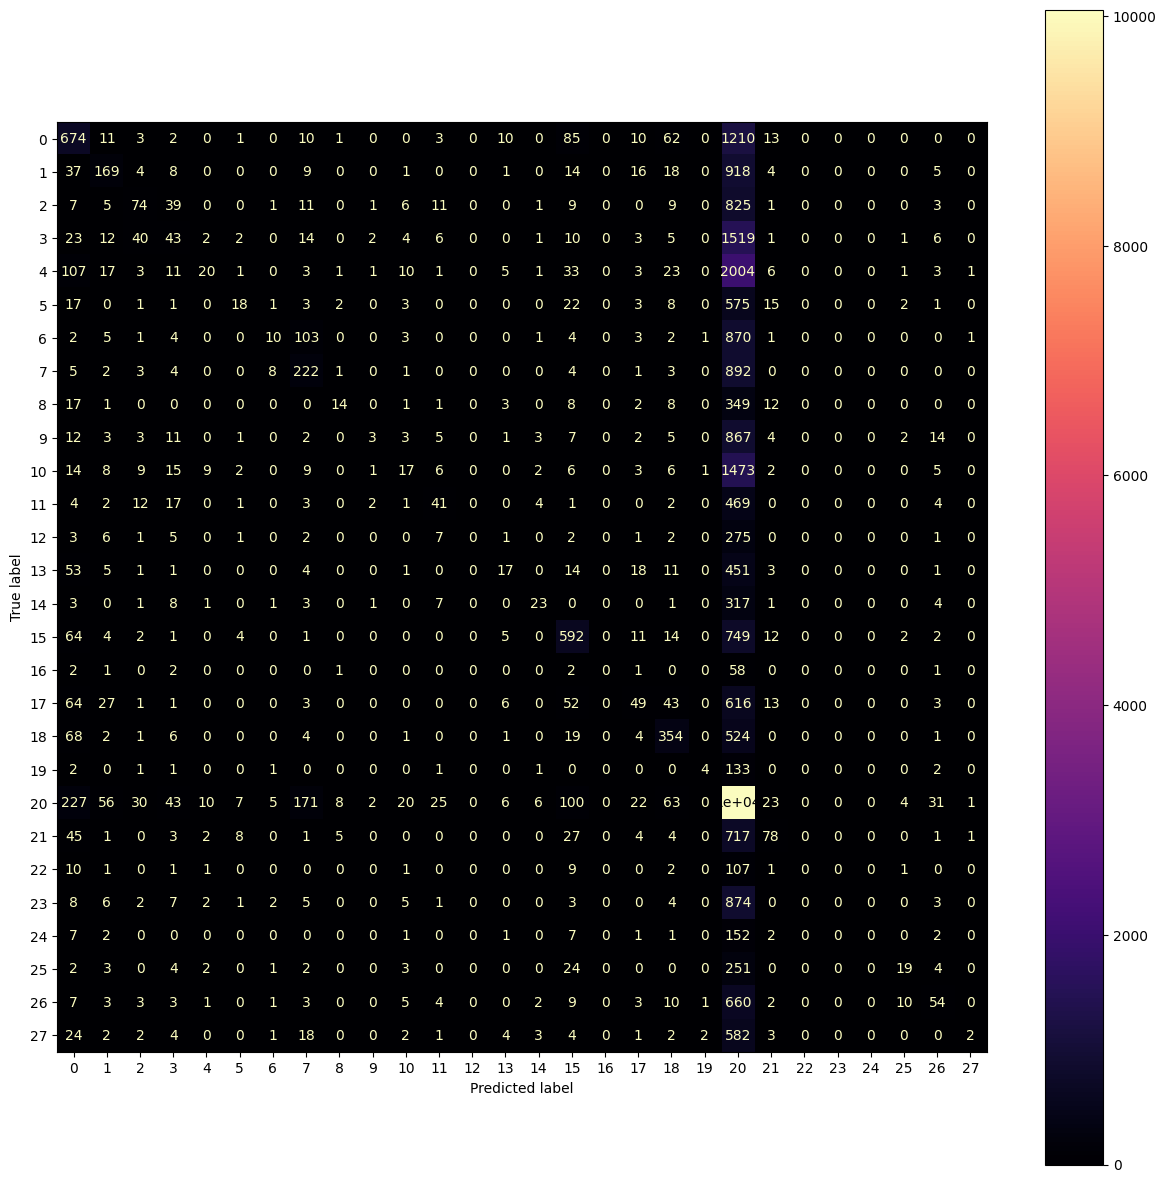

In [177]:
y_emo_predict = clf1.predict(X_embed_avg_test)
print(f"Score for Emotions: {clf1.score(X_embed_avg_test, y_emo_test)}")
metrics(y_emo_test, y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=y_emo_test, y_pred=y_emo_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax, cmap='magma')

Score for Sentiments: 0.4951010499839139
Accuracy: 0.4951010499839139
Precision (Weighted): 0.5069038625606171
F1 Score (Weighted): 0.48572551504966904
F1 Score (Macro): 0.43896062454565515
              precision    recall  f1-score   support

           0       0.52      0.15      0.23      3737
           1       0.47      0.43      0.45      7784
           2       0.42      0.57      0.49     10915
           3       0.61      0.58      0.59     11755

    accuracy                           0.50     34191
   macro avg       0.50      0.43      0.44     34191
weighted avg       0.51      0.50      0.49     34191



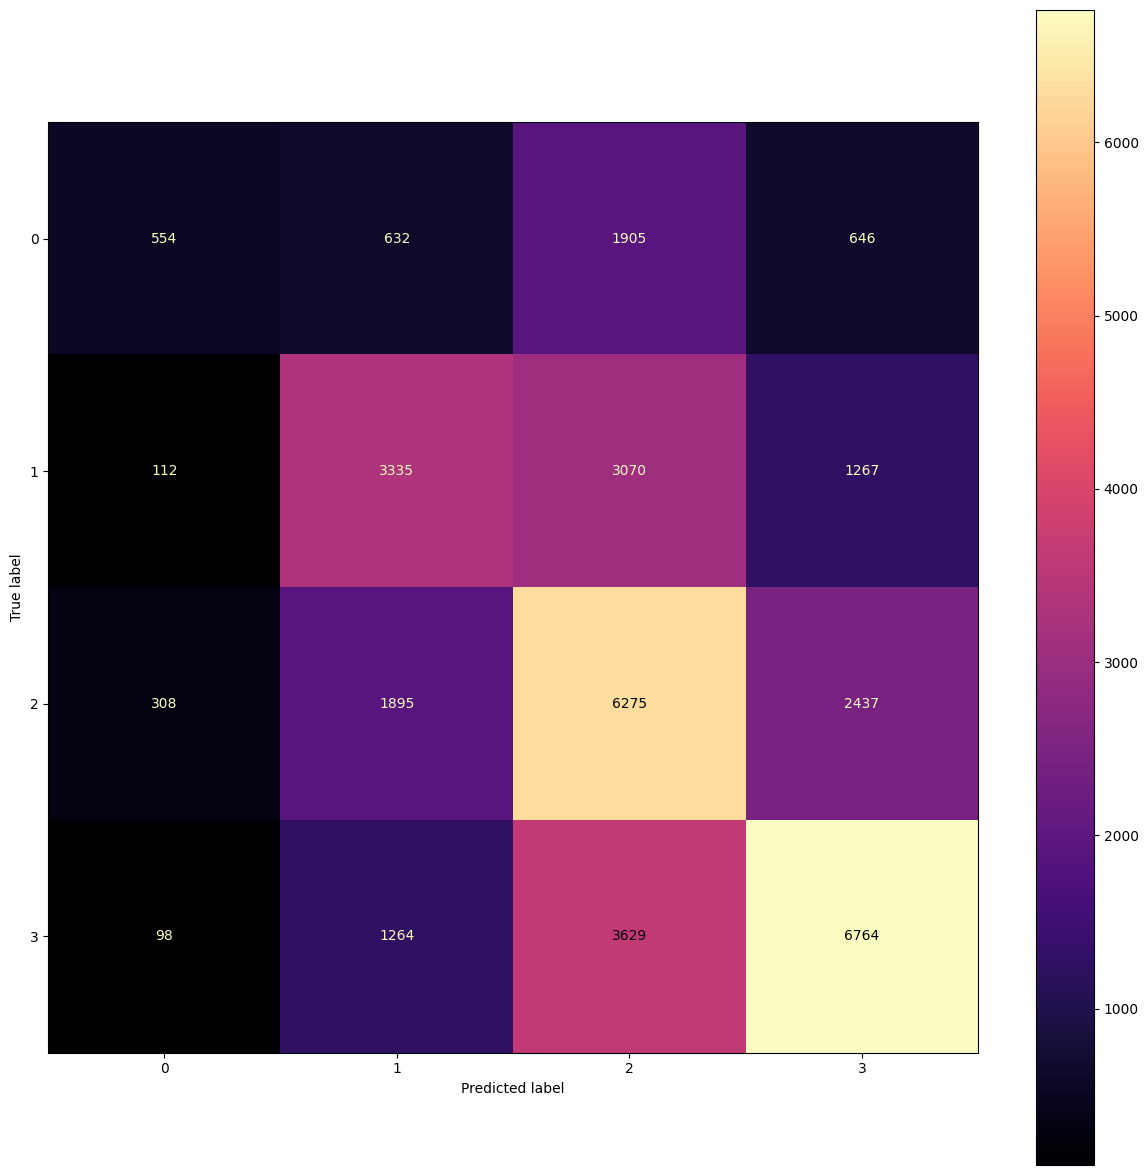

In [178]:
y_sent_predict = clf2.predict(X_embed_avg_test)
print(f"Score for Sentiments: {clf2.score(X_embed_avg_test, y_sent_test)}")
metrics(y_sent_test, y_sent_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=y_sent_test, y_pred=y_sent_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax, cmap='magma')

In [179]:
parameters = {"activation":("identity", "logistic", "tanh", "relu"),"hidden_layer_sizes":((5,5),(5,10)), "solver":("adam","sgd")}
#currently 5 neurons then 5 neurons and 5 neurons then 10 neurons in the hidden layer
clfMLP = MLPClassifier(early_stopping=True,verbose=True, max_iter=100)
classifier = GridSearchCV(estimator=clfMLP, param_grid=parameters, n_jobs=-1)
skip=False
if(not skip):
    if (os.path.exists('models/new_split/MLP1GridCV_Twitter_model_emb.pickle')):
        pickle_in = open('models/new_split/MLP1GridCV_Twitter_model_emb.pickle','rb')
        clf1 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        X_embed_avg_train, y_emo_train
        classifier = classifier.fit(X_embed_avg_train, y_emo_train)
        with open('models/new_split/MLP1GridCV_Twitter_model_emb.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/new_split/MLP1GridCV_Twitter_model_emb.pickle','rb')
        clf1 = pickle.load(pickle_in)

    if (os.path.exists('models/new_split/MLP2GridCV_Twitter_model_emb.pickle')):
        pickle_in = open('models/new_split/MLP2GridCV_Twitter_model_emb.pickle','rb')
        clf2 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        classifier = classifier.fit(X_embed_avg_train,y_sent_train)
        with open('models/new_split/MLP2GridCV_Twitter_model_emb.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/new_split/MLP2GridCV_Twitter_model_emb.pickle','rb')
        clf2 = pickle.load(pickle_in)
else:
    print("skipped")

pickle file used
pickle file used


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.1.2 wh

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.34339446053054895
Precision (Weighted): 0.1899110131432744
F1 Score (Weighted): 0.20833619664976433
F1 Score (Macro): 0.058257258816966244
              precision    recall  f1-score   support

           0       0.36      0.28      0.32      2095
           1       0.00      0.00      0.00      1204
           2       0.22      0.02      0.04      1003
           3       0.00      0.00      0.00      1694
           4       0.00      0.00      0.00      2255
           5       0.67      0.00      0.01       672
           6       0.00      0.00      0.00      1011
           7       0.33      0.08      0.13      1146
           8       0.00      0.00      0.00       416
           9       0.00      0.00      0.00       948
          10       0.00      0.00      0.00      1588
          11       0.00      0.00      0.00       563
          12       0.00      0.00      0.00       307
          13       0.00      0.00      0.00       580
          14       0.00      0.00     

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_s

              precision    recall  f1-score   support

           0       0.36      0.28      0.32      2095
           1       0.00      0.00      0.00      1204
           2       0.22      0.02      0.04      1003
           3       0.00      0.00      0.00      1694
           4       0.00      0.00      0.00      2255
           5       0.67      0.00      0.01       672
           6       0.00      0.00      0.00      1011
           7       0.33      0.08      0.13      1146
           8       0.00      0.00      0.00       416
           9       0.00      0.00      0.00       948
          10       0.00      0.00      0.00      1588
          11       0.00      0.00      0.00       563
          12       0.00      0.00      0.00       307
          13       0.00      0.00      0.00       580
          14       0.00      0.00      0.00       371
          15       0.39      0.37      0.38      1463
          16       0.00      0.00      0.00        68
          17       0.00    

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


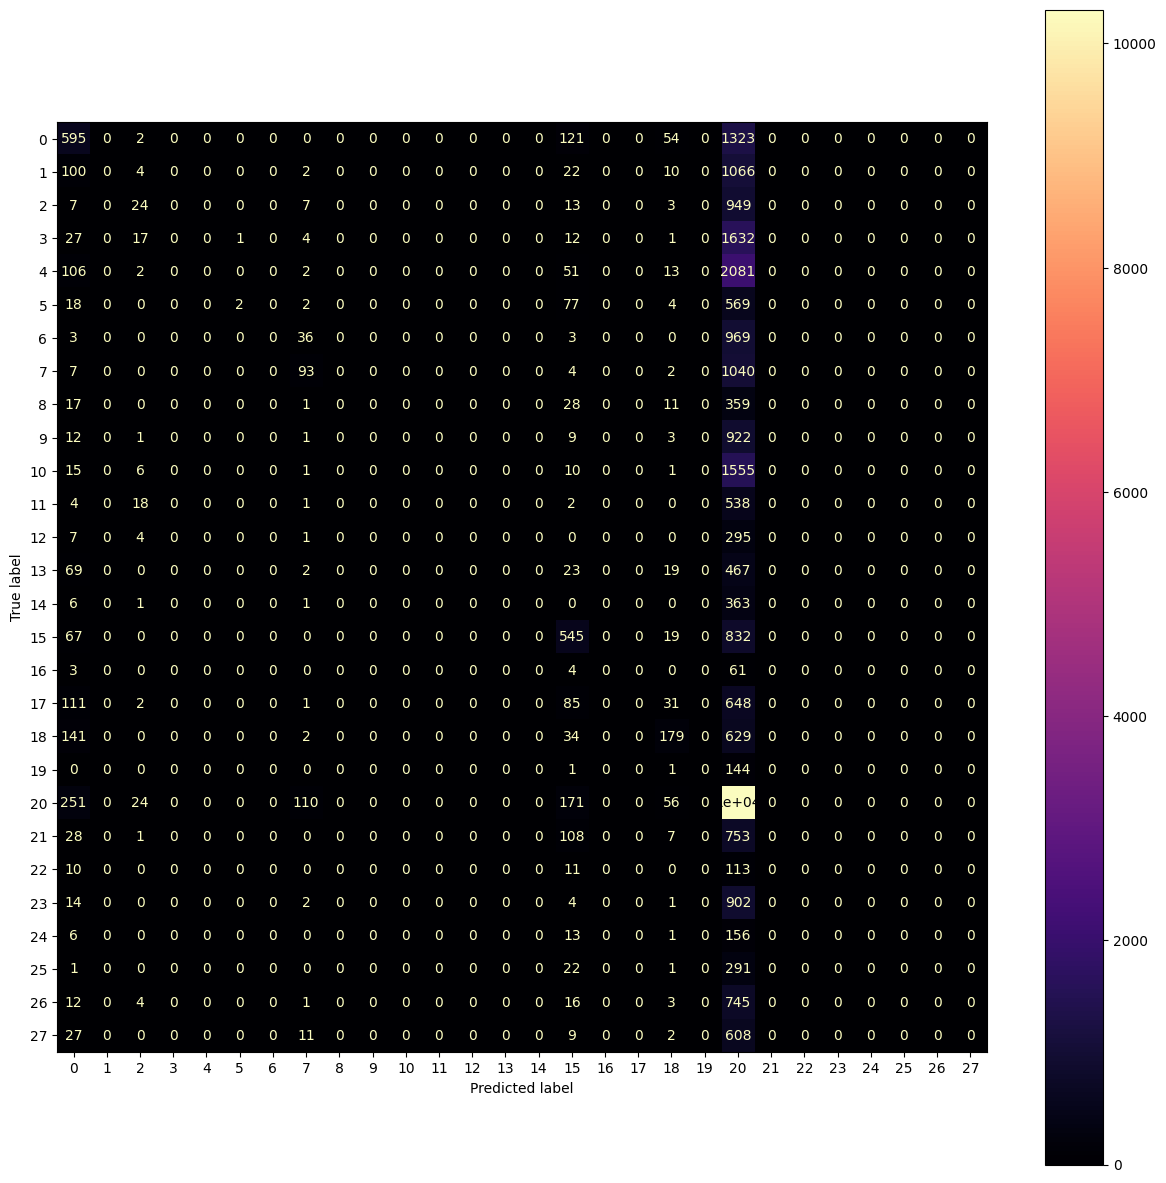

In [180]:
if (os.path.exists('models/new_split/MLP1GridCV_Twitter_model_emb.pickle') and not skip):
    y_emo_predict = clf1.best_estimator_.predict(X_embed_avg_test)
    metrics(y_emo_test,y_emo_predict)
    print(f"Best estimator (Emotion): {clf1.best_estimator_}, Best Score: {clf1.best_score_}")
    metrics(y_emo_test,y_emo_predict)
    cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=y_emo_test,y_pred= y_emo_predict))
    fig, ax = plt.subplots(figsize=(15,15))
    cmp.plot(ax=ax,cmap='magma')
else:
    print("skipped")

Accuracy: 0.4918253341522623
Precision (Weighted): 0.48763441602206437
F1 Score (Weighted): 0.4864398036763785
F1 Score (Macro): 0.45372270840256124
              precision    recall  f1-score   support

           0       0.43      0.25      0.31      3737
           1       0.45      0.46      0.46      7784
           2       0.44      0.46      0.45     10915
           3       0.57      0.62      0.60     11755

    accuracy                           0.49     34191
   macro avg       0.47      0.45      0.45     34191
weighted avg       0.49      0.49      0.49     34191

Best estimator (Sentiment): MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(5, 10), max_iter=100, verbose=True), Best Score: 0.48648512567740354


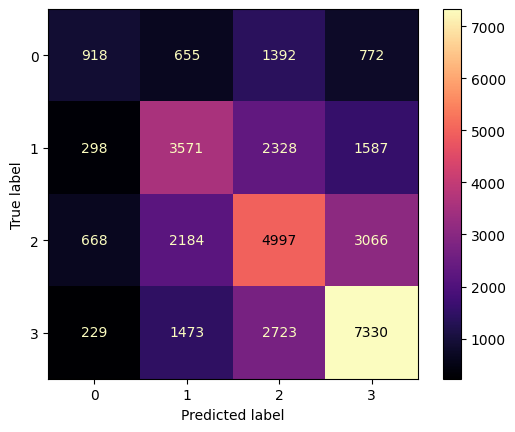

In [182]:
if (os.path.exists('models/new_split/MLP2GridCV_Twitter_model_emb.pickle') and not skip):
    y_sent_predict = clf2.best_estimator_.predict(X_embed_avg_test)
    metrics(y_sent_test,y_sent_predict)
    print(f"Best estimator (Sentiment): {clf2.best_estimator_}, Best Score: {clf2.best_score_}")
    ConfusionMatrixDisplay.from_predictions(y_true=y_sent_test, y_pred=y_sent_predict, cmap='magma')
else:
    print("skipped")

In [183]:
if (os.path.exists('models/wiki.pickle')):
    pickle_in = open('models/wiki.pickle','rb')
    wiki = pickle.load(pickle_in)
    print("pickle file used")
else:
    model =gensim.downloader.load("glove-wiki-gigaword-300")
    with open('models/wiki.pickle','wb') as f:
        pickle.dump(model, f)

    pickle_in = open('models/wiki.pickle','rb')
    wiki = pickle.load(pickle_in)

pickle file used


In [184]:
model = gensim.downloader.load("glove-wiki-gigaword-300")
X_train_emb,X_test_emb, y_emo_train, y_emo_test, y_sent_train, y_sent_test= train_test_split(post_tokens, encodedEmo, encodedSentiment, test_size = 0.2, train_size=0.8)
post_tokens_training = [] 

# Cleaning Wiki model
for post in X_train_emb:
    clean_post = [] 
    for word in post:
        if word in model:
            clean_post.append(word)
        else:
            continue
    post_tokens_training.append(clean_post)

    
# Average embed calculation
average_embeds_train = []
for post in post_tokens_training:
    token_embeddings = []
    for word in post:
        token_embeddings.append(model[word]) 
   
    average_embeds_train.append(np.mean(token_embeddings,axis=0)) 


posts_tokens_in_model_test = [] 
# Cleaning Wiki model
for post in X_test_emb:
    clean_test = [] 
    for word in post:
        if word in model:
            clean_test.append(word)
        else:
            continue
    posts_tokens_in_model_test.append(clean_test)

    
# Average embed calculation
average_embeds_test = []
for post in posts_tokens_in_model_test:
    token_embeddings = []
    for word in post:
        token_embeddings.append(model[word])
    average_embeds_test.append(np.mean(token_embeddings,axis=0)) 


X_embed_avg_train = average_embeds_train
X_embed_avg_test = average_embeds_test
print(f"Shape of training set: {np.shape(X_embed_avg_train)}")
print(f"Shape of test set: {np.shape(X_embed_avg_test)}")

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Shape of training set: (137456,)
Shape of test set: (34364,)


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [185]:
#clean training and test sets
# RUN TWICE
for i in range(2):
    print(f"Shape of test set: {np.shape(X_embed_avg_test)}")
    print(np.shape(y_emo_test))

    # Remove empty posts
    for i in range(len(X_embed_avg_train)):
        if i >= len(X_embed_avg_train):
            break
        if X_embed_avg_train[i].shape == (300,):
            continue
        else:
            X_embed_avg_train.pop(i)
            y_emo_train = np.delete(y_emo_train, i)
            y_sent_train = np.delete(y_sent_train, i)

    # Remove empty posts
    for i in range(len(X_embed_avg_test)):
        if i >= len(X_embed_avg_test):
            break
        if X_embed_avg_test[i].shape == (300,):
            continue
        else:
            X_embed_avg_test.pop(i)
            y_emo_test = np.delete(y_emo_test, i)
            y_sent_test = np.delete(y_sent_test, i)


    print(f"Shape of training set: {np.shape(X_embed_avg_train)}")
    print(f"Shape of test set: {np.shape(X_embed_avg_test)}")
    print(np.shape(y_emo_test))

    # Convert to np array
    for i in range(len(X_embed_avg_train)):
        X_embed_avg_train[i] = np.array(X_embed_avg_train[i])

    for i in range(len(X_embed_avg_test)):
        X_embed_avg_test[i] = np.array(X_embed_avg_test[i])

Shape of test set: (34364,)
(34364,)
Shape of training set: (136775,)
Shape of test set: (34194, 300)
(34194,)
Shape of test set: (34194, 300)
(34194,)
Shape of training set: (136771, 300)
Shape of test set: (34194, 300)
(34194,)


In [186]:
classifier = MLPClassifier(max_iter=100)

if (os.path.exists('models/Embeddings_Wiki_MLP_model.pickle')):
    pickle_in = open('models/Embeddings_Wiki_MLP_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print('pickle file used')
else:
    EMLP = classifier.fit(X_embed_avg_train, y_emo_train)
    with open('models/Embeddings_Wiki_MLP_model.pickle','wb') as f:
            pickle.dump(EMLP, f)
    pickle_in = open('models/Embeddings_Wiki_MLP_model.pickle','rb')
    clf1 = pickle.load(pickle_in)

        
if (os.path.exists('models/Embeddings_Wiki_MLP_model2.pickle')):
    pickle_in = open('models/Embeddings_Wiki_MLP_model2.pickle','rb')
    clf2 = pickle.load(pickle_in)
    print('pickle file used')
else:
    EMLP2 = classifier.fit(X_embed_avg_train, y_sent_train)
    with open('models/Embeddings_Wiki_MLP_model2.pickle','wb') as f:
            pickle.dump(EMLP2, f)
    pickle_in = open('models/Embeddings_Wiki_MLP_model2.pickle','rb')
    clf2 = pickle.load(pickle_in)

pickle file used
pickle file used


Score for Emotions: 0.4189039012692285
Accuracy: 0.4189039012692285
Precision (Weighted): 0.431725899307596
F1 Score (Weighted): 0.3407078546392715
F1 Score (Macro): 0.23434262484707633
              precision    recall  f1-score   support

           0       0.60      0.39      0.47      2101
           1       0.51      0.38      0.44      1240
           2       0.41      0.16      0.23      1024
           3       0.33      0.03      0.06      1678
           4       0.41      0.04      0.07      2229
           5       0.36      0.08      0.13       638
           6       0.41      0.05      0.08       992
           7       0.43      0.27      0.33      1164
           8       0.57      0.14      0.23       423
           9       0.30      0.04      0.07       940
          10       0.31      0.08      0.13      1483
          11       0.33      0.16      0.22       602
          12       0.47      0.12      0.18       313
          13       0.51      0.12      0.19       592
   

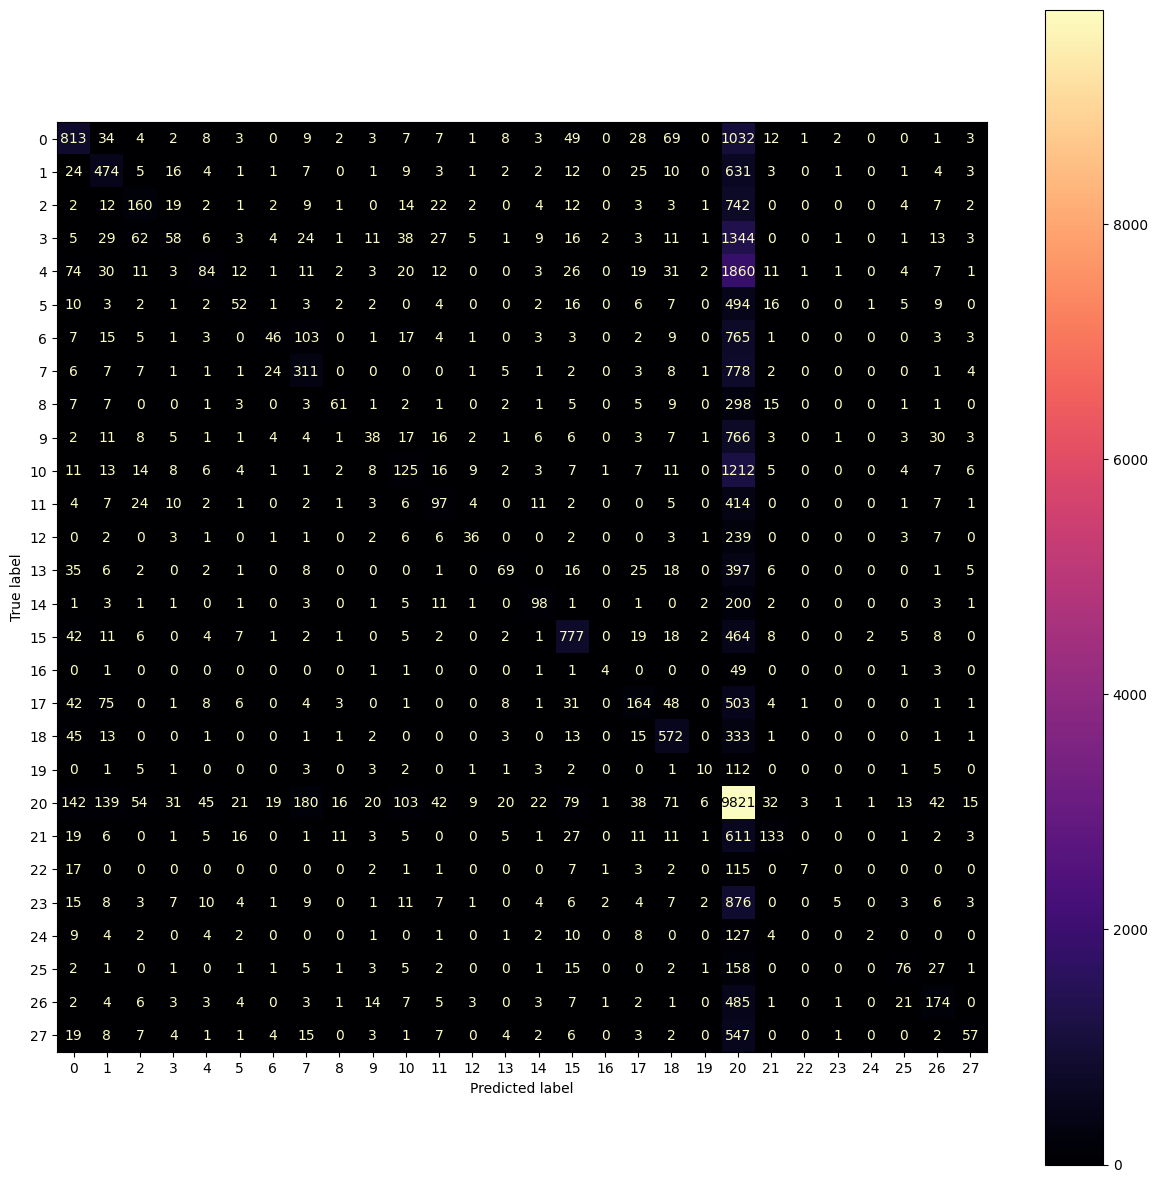

In [187]:
y_emo_predict = clf1.predict(X_embed_avg_test)
print(f"Score for Emotions: {clf1.score(X_embed_avg_test, y_emo_test)}")
metrics(y_emo_test, y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=y_emo_test, y_pred=y_emo_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax, cmap='magma')

Score for Sentiments: 0.5793706498216061
Accuracy: 0.5793706498216061
Precision (Weighted): 0.5944959788419028
F1 Score (Weighted): 0.5756825556394428
F1 Score (Macro): 0.5392550597599245
              precision    recall  f1-score   support

           0       0.59      0.26      0.36      3845
           1       0.56      0.57      0.57      7643
           2       0.49      0.65      0.56     10986
           3       0.71      0.63      0.67     11720

    accuracy                           0.58     34194
   macro avg       0.59      0.53      0.54     34194
weighted avg       0.59      0.58      0.58     34194



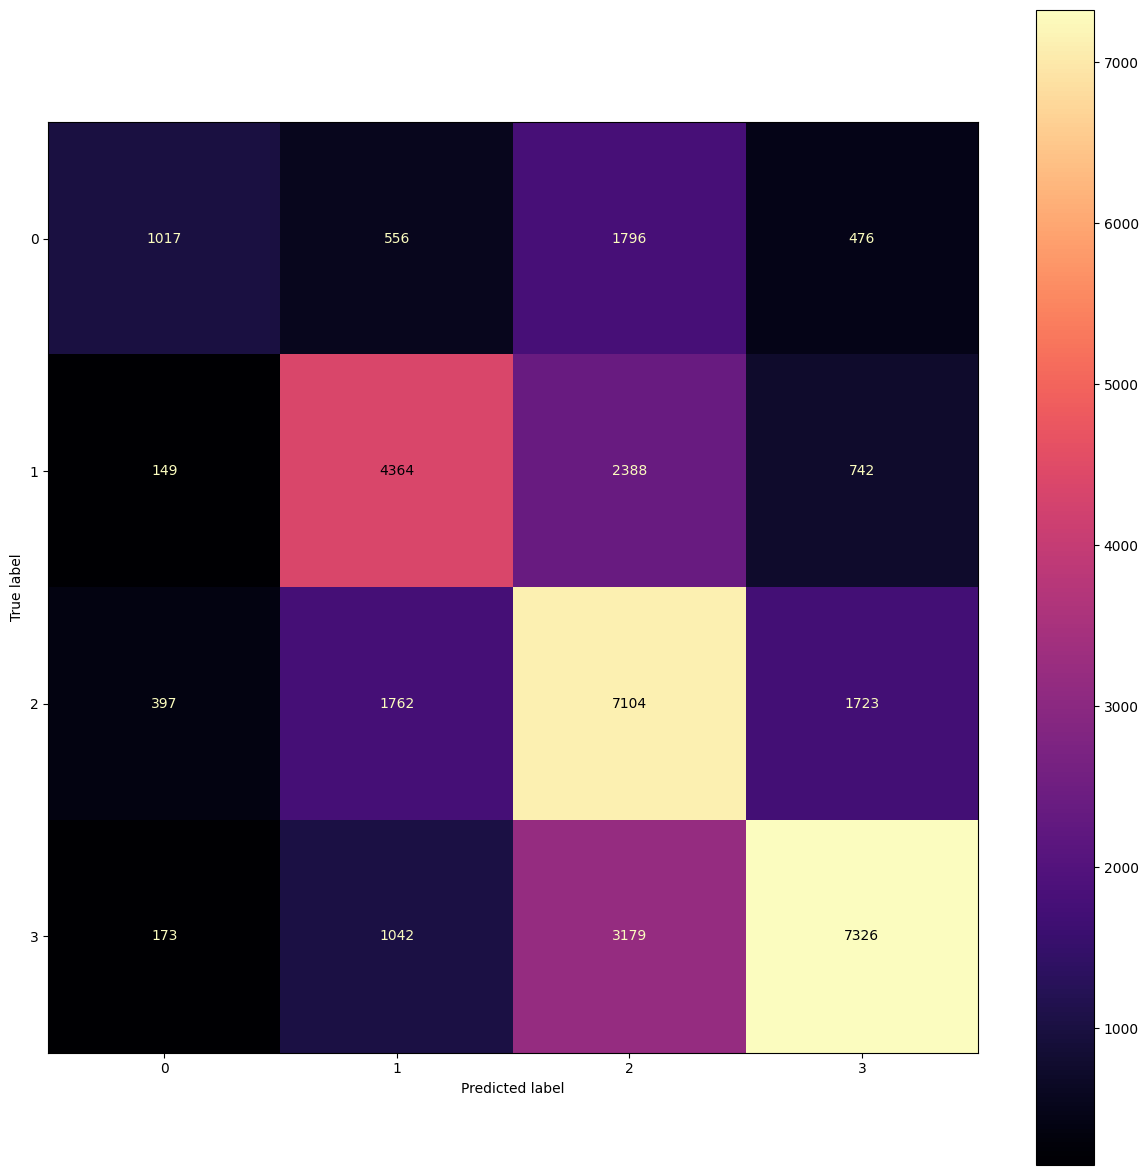

In [188]:
y_sent_predict = clf2.predict(X_embed_avg_test)
print(f"Score for Sentiments: {clf2.score(X_embed_avg_test, y_sent_test)}")
metrics(y_sent_test, y_sent_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=y_sent_test, y_pred=y_sent_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax, cmap='magma')

In [189]:
parameters = {"activation":("identity", "logistic", "tanh", "relu"),"hidden_layer_sizes":((5,5),(5,10)), "solver":("adam","sgd")}
#currently 5 neurons then 5 neurons and 5 neurons then 10 neurons in the hidden layer
clfMLP = MLPClassifier(early_stopping=True,verbose=True, max_iter=100)
classifier = GridSearchCV(estimator=clfMLP, param_grid=parameters, n_jobs=-1)
skip=False
if(not skip):
    if (os.path.exists('models/new_split/MLP1GridCV_Wiki_model_emb.pickle')):
        pickle_in = open('models/new_split/MLP1GridCV_Wiki_model_emb.pickle','rb')
        clf1 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        X_embed_avg_train, y_emo_train
        classifier = classifier.fit(X_embed_avg_train, y_emo_train)
        with open('models/new_split/MLP1GridCV_Wiki_model_emb.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/new_split/MLP1GridCV_Wiki_model_emb.pickle','rb')
        clf1 = pickle.load(pickle_in)

    if (os.path.exists('models/new_split/MLP2GridCV_Wiki_model_emb.pickle')):
        pickle_in = open('models/new_split/MLP2GridCV_Wiki_model_emb.pickle','rb')
        clf2 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        classifier = classifier.fit(X_embed_avg_train,y_sent_train)
        with open('models/new_split/MLP2GridCV_Wiki_model_emb.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/new_split/MLP2GridCV_Wiki_model_emb.pickle','rb')
        clf2 = pickle.load(pickle_in)
else:
    print("skipped")

pickle file used
pickle file used


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.1.2 wh

Accuracy: 0.35626133239749663
Precision (Weighted): 0.23083496323163072
F1 Score (Weighted): 0.23566305836078766
F1 Score (Macro): 0.08782347405468795
              precision    recall  f1-score   support

           0       0.41      0.31      0.35      2101
           1       0.39      0.20      0.26      1240
           2       0.31      0.05      0.09      1024
           3       0.00      0.00      0.00      1678
           4       0.00      0.00      0.00      2229
           5       0.00      0.00      0.00       638
           6       0.00      0.00      0.00       992
           7       0.32      0.13      0.19      1164
           8       0.00      0.00      0.00       423
           9       0.00      0.00      0.00       940
          10       0.00      0.00      0.00      1483
          11       0.00      0.00      0.00       602
          12       0.00      0.00      0.00       313
          13       0.00      0.00      0.00       592
          14       0.26      0.01     

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_s

              precision    recall  f1-score   support

           0       0.41      0.31      0.35      2101
           1       0.39      0.20      0.26      1240
           2       0.31      0.05      0.09      1024
           3       0.00      0.00      0.00      1678
           4       0.00      0.00      0.00      2229
           5       0.00      0.00      0.00       638
           6       0.00      0.00      0.00       992
           7       0.32      0.13      0.19      1164
           8       0.00      0.00      0.00       423
           9       0.00      0.00      0.00       940
          10       0.00      0.00      0.00      1483
          11       0.00      0.00      0.00       602
          12       0.00      0.00      0.00       313
          13       0.00      0.00      0.00       592
          14       0.26      0.01      0.03       336
          15       0.54      0.30      0.39      1387
          16       0.00      0.00      0.00        62
          17       0.21    

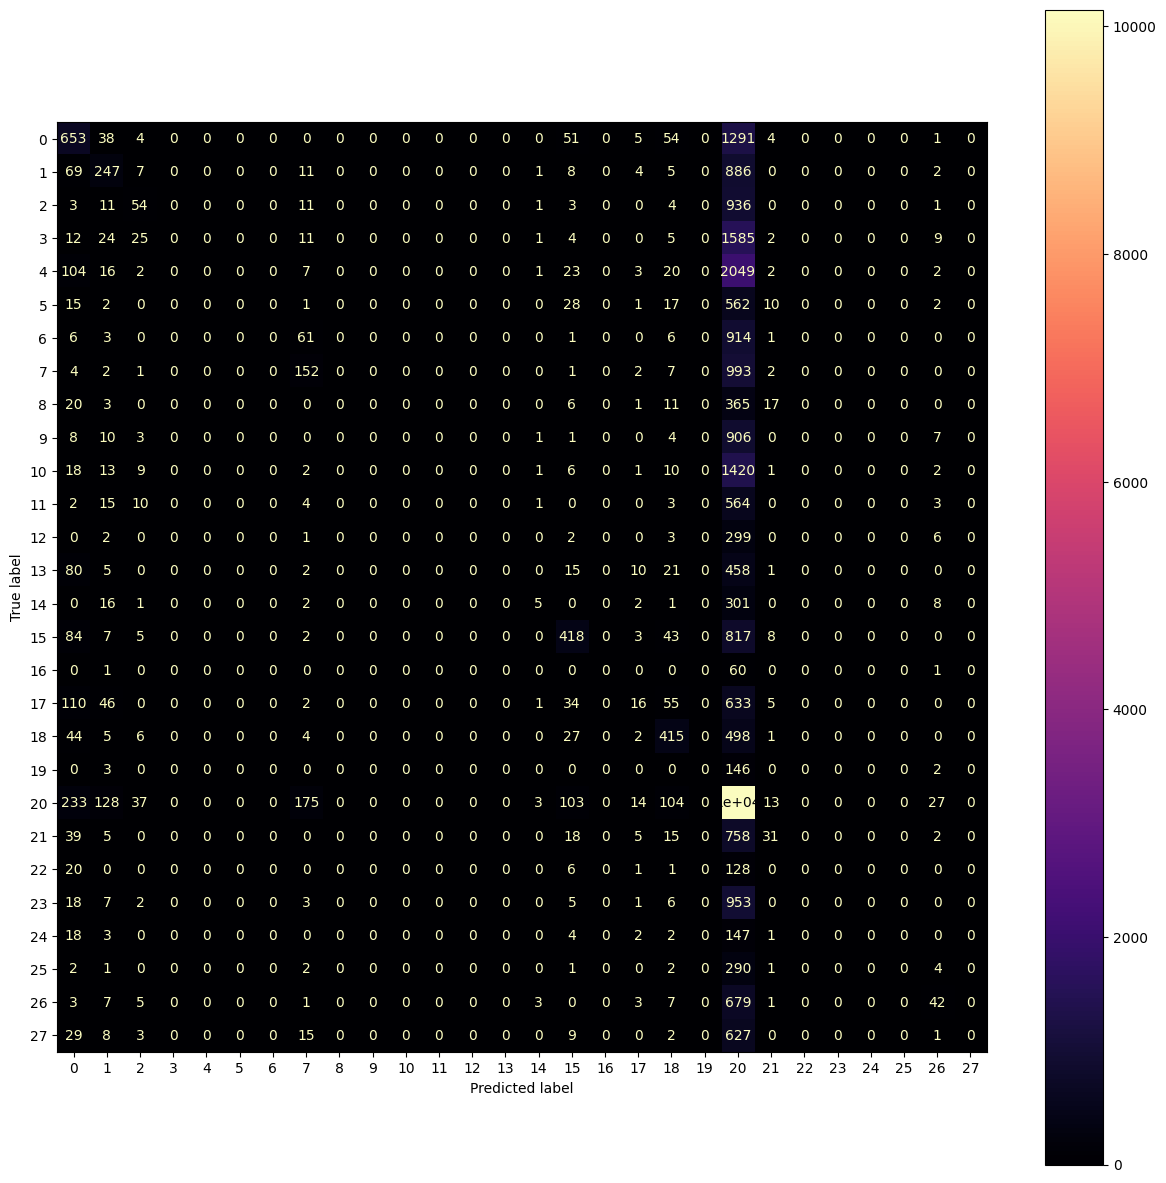

In [190]:
if (os.path.exists('models/new_split/MLP1GridCV_Wiki_model_emb.pickle') and not skip):
    y_emo_predict = clf1.best_estimator_.predict(X_embed_avg_test)
    metrics(y_emo_test,y_emo_predict)
    print(f"Best estimator (Emotion): {clf1.best_estimator_}, Best Score: {clf1.best_score_}")
    metrics(y_emo_test,y_emo_predict)
    cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=y_emo_test,y_pred= y_emo_predict))
    fig, ax = plt.subplots(figsize=(15,15))
    cmp.plot(ax=ax,cmap='magma')
else:
    print("skipped")

Accuracy: 0.49707551032344854
Precision (Weighted): 0.4972254287168954
F1 Score (Weighted): 0.49385696006537
F1 Score (Macro): 0.4610463748652832
              precision    recall  f1-score   support

           0       0.41      0.26      0.32      3845
           1       0.48      0.43      0.46      7643
           2       0.43      0.52      0.47     10986
           3       0.59      0.59      0.59     11720

    accuracy                           0.50     34194
   macro avg       0.48      0.45      0.46     34194
weighted avg       0.50      0.50      0.49     34194

Best estimator (Sentiment): MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(5, 10), max_iter=100, verbose=True), Best Score: 0.49279812824449803


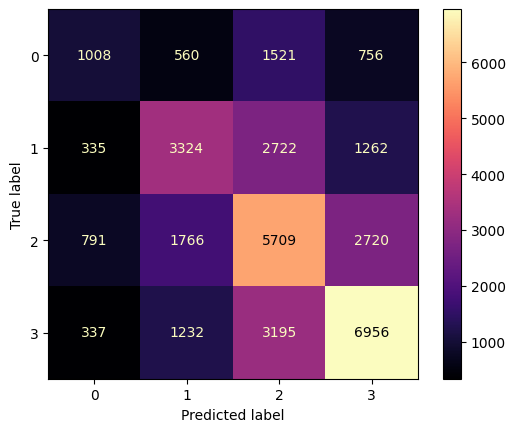

In [192]:
if (os.path.exists('models/new_split/MLP2GridCV_Wiki_model_emb.pickle') and not skip):
    y_sent_predict = clf2.best_estimator_.predict(X_embed_avg_test)
    metrics(y_sent_test,y_sent_predict)
    print(f"Best estimator (Sentiment): {clf2.best_estimator_}, Best Score: {clf2.best_score_}")
    ConfusionMatrixDisplay.from_predictions(y_true=y_sent_test, y_pred=y_sent_predict, cmap='magma')
else:
    print("skipped")